### Summary

In this project data modeling and model selection are the main goals. The models applied here are regression models.In general regression models trying to explore the connection between an response and a predictor variables. The models are applied here to the teacher evaluation score data set. The goal is to make predictions like the prediction of the teacher evaluation score based on age. On the way different cleaning techniques and exploration methods are applied and helper functions written. Also the train-test-working flow is applied to increase accuracy, validity and repeatability. Besides other packages the moderndive packages are used in the tidyverse.


### Install and call packages

In [187]:
install.packages("tidyverse", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'tidyverse' is in use and will not be installed"

In [188]:
# Which packages were installed
library(tidyverse)

In [189]:
tidyverse_packages()

[1] "broom"       "cli"         "crayon"      "dplyr"       "dbplyr"     
 [6] "forcats"     "ggplot2"     "haven"       "hms"         "httr"       
[11] "jsonlite"    "lubridate"   "magrittr"    "modelr"      "purrr"      
[16] "readr"       "readxl\n(>=" "reprex"      "rlang"       "rstudioapi" 
[21] "rvest"       "stringr"     "tibble"      "tidyr"       "xml2"       
[26] "tidyverse"

In [190]:
install.packages("moderndive", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'moderndive' is in use and will not be installed"

In [191]:
# Description
# Datasets and wrapper functions for tidyverse-friendly introductory linear regression, used in ModernDive:
# An Introduction to Statistical and Data Sciences via R available at <http://moderndive.com/> 
# https://cran.r-project.org/web/packages/moderndive/moderndive.pdf

library(moderndive)
library(Metrics)

### Teacher Evaluations dataset (evals)

<p>
The data are gathered from end of semester student evaluations for a large sample of professors
from the University of Texas at Austin. In addition, six students rate the 
professors' physical appearance. The result is a data frame where each row contains a different course 
and each column has information on either the course or the professor.
The data are gathered from end of semester student evaluations for a large sample of professors 
from the University of Texas at Austin. In addition, six students rate the professors' physical appearance. 
The result is a data frame where each row contains a different course and each column has information 
on either the course or the professor.
</p>

####  Looking at the whole data

In [192]:
# dataset: evals
# The data are gathered from end of semester student evaluations for a large sample of professors from
# the University of Texas at Austin. In addition, six students rate the professors’ physical appearance.
# The result is a data frame where each row contains a different course and each column has information 
# on either the course or the professor
# https://www.openintro.org/stat/data/?data=evals

glimpse(evals)

Observations: 463
Variables: 13
$ ID           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
$ score        <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8,...
$ age          <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40...
$ bty_avg      <dbl> 5.000, 5.000, 5.000, 5.000, 3.000, 3.000, 3.000, 3.333...
$ gender       <fct> female, female, female, female, male, male, male, male...
$ ethnicity    <fct> minority, minority, minority, minority, not minority, ...
$ language     <fct> english, english, english, english, english, english, ...
$ rank         <fct> tenure track, tenure track, tenure track, tenure track...
$ pic_outfit   <fct> not formal, not formal, not formal, not formal, not fo...
$ pic_color    <fct> color, color, color, color, color, color, color, color...
$ cls_did_eval <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, 1...
$ cls_students <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 20...
$ cls_level    <fct>

In [193]:
head(evals)

ID,score,age,bty_avg,gender,ethnicity,language,rank,pic_outfit,pic_color,cls_did_eval,cls_students,cls_level
1,4.7,36,5,female,minority,english,tenure track,not formal,color,24,43,upper
2,4.1,36,5,female,minority,english,tenure track,not formal,color,86,125,upper
3,3.9,36,5,female,minority,english,tenure track,not formal,color,76,125,upper
4,4.8,36,5,female,minority,english,tenure track,not formal,color,77,123,upper
5,4.6,59,3,male,not minority,english,tenured,not formal,color,17,20,upper
6,4.3,59,3,male,not minority,english,tenured,not formal,color,35,40,upper


In [194]:
tail(evals)

ID,score,age,bty_avg,gender,ethnicity,language,rank,pic_outfit,pic_color,cls_did_eval,cls_students,cls_level
458,4.1,32,6.833,male,not minority,english,tenure track,not formal,color,9,21,lower
459,4.5,32,6.833,male,not minority,english,tenure track,not formal,color,52,86,upper
460,3.5,42,5.333,female,minority,non-english,tenure track,not formal,color,48,84,upper
461,4.4,42,5.333,female,minority,non-english,tenure track,not formal,color,52,67,upper
462,4.4,42,5.333,female,minority,non-english,tenure track,not formal,color,54,66,upper
463,4.1,42,5.333,female,minority,non-english,tenure track,not formal,color,28,35,lower


In [195]:
nrow(evals)
ncol(evals)
dim(evals)

[1] 463

[1] 13

[1] 463  13

In [196]:
names(evals)
length(names(evals))

[1] "ID"           "score"        "age"          "bty_avg"      "gender"      
 [6] "ethnicity"    "language"     "rank"         "pic_outfit"   "pic_color"   
[11] "cls_did_eval" "cls_students" "cls_level"

[1] 13

In [197]:
summary(evals)

       ID            score            age           bty_avg         gender   
 Min.   :  1.0   Min.   :2.300   Min.   :29.00   Min.   :1.667   female:195  
 1st Qu.:116.5   1st Qu.:3.800   1st Qu.:42.00   1st Qu.:3.167   male  :268  
 Median :232.0   Median :4.300   Median :48.00   Median :4.333               
 Mean   :232.0   Mean   :4.175   Mean   :48.37   Mean   :4.418               
 3rd Qu.:347.5   3rd Qu.:4.600   3rd Qu.:57.00   3rd Qu.:5.500               
 Max.   :463.0   Max.   :5.000   Max.   :73.00   Max.   :8.167               
        ethnicity          language             rank          pic_outfit 
 minority    : 64   english    :435   teaching    :102   formal    : 77  
 not minority:399   non-english: 28   tenure track:108   not formal:386  
                                      tenured     :253                   
                                                                         
                                                                         
          

In [198]:
class(evals)

[1] "tbl_df"     "tbl"        "data.frame"

In [199]:
# None missing values are occuring
sum(is.na(evals))

[1] 0

#### Univariate EDA - Looking at the teaching score variable

In [200]:
unique(evals$score)
str(evals$score)
class(evals$score)
dim(evals$score)
summary(evals$score)
frequencies <- count(evals, score)
frequencies[1:5,1:2]
table(evals$score)

[1] 4.7 4.1 3.9 4.8 4.6 4.3 2.8 3.4 4.5 3.8 4.9 4.4 4.2 3.5 2.5 4.0 5.0 3.6 3.7
[20] 2.9 3.3 3.2 2.3 3.0 3.1 2.7 2.4

 num [1:463] 4.7 4.1 3.9 4.8 4.6 4.3 2.8 4.1 3.4 4.5 ...


[1] "numeric"

NULL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   3.800   4.300   4.175   4.600   5.000 

score,n
2.3,1
2.4,1
2.5,2
2.7,2
2.8,3



2.3 2.4 2.5 2.7 2.8 2.9   3 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9   4 4.1 4.2 4.3 
  1   1   2   2   3   2   5   6   4  11  11  17  20  19  19  26  24  28  22  26 
4.4 4.5 4.6 4.7 4.8 4.9   5 
 43  41  34  25  35  25  11 

#### Visualize data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


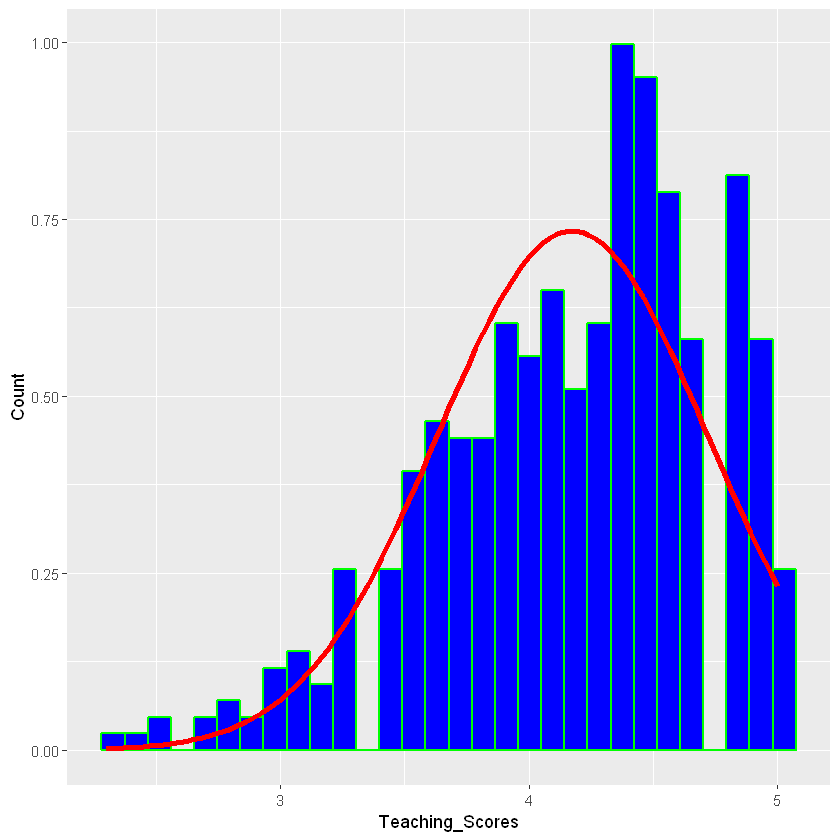

In [201]:
# Average professor evaluation score: (1) very unsatisfactory - (5) excellent.
evals %>%
ggplot(aes(x=score)) +
geom_histogram(color="green", size=0.8, fill="blue", aes(y =..density..)) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(evals$score), sd = sd(evals$score)), color="red", size=1.5)

# This stat makes it easy to superimpose a function on top of an existing plot. 
# The function is called with a grid of evenly spaced values along the x axis, and the results are drawn 
# (by default) with a line.
# https://www.rdocumentation.org/packages/ggplot2/versions/3.1.0/topics/stat_function



#### Data transformation of teaching scores

<p>
Data transformation changes a variable with the output of a function of that variable.
For example the logarithm of basis 10 is a function used for changing the variable.
As this is done over all values of a variable the distribution of that variable is changed.
Making the distribution more normal is one major goal of data transformation,
because(predictive) modeling fits better with distribution similar to the normal distribution.
Having a normal distribution reduces skewness, make better linear relationships, allows for 
additive relationships or make spreads more equal.
All this will hopefully in better predictions or increase model performance.
</p>
<p>
More information on <a href= "http://fmwww.bc.edu/repec/bocode/t/transint.html">
Transformations</a> here.
</p>

In [202]:
frequency_table_score <- count(evals, score)
glimpse(frequency_table_score)
frequency_table_score_max<-max(frequency_table_score)
frequency_table_score_max
frequency_table_score[19:23,1:2]
which(frequency_table_score==frequency_table_score_max,  arr.ind = TRUE)


Observations: 27
Variables: 2
$ score <dbl> 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3...
$ n     <int> 1, 1, 2, 2, 3, 2, 5, 6, 4, 11, 11, 17, 20, 19, 19, 26, 24, 28...


[1] 43

score,n
4.2,22
4.3,26
4.4,43
4.5,41
4.6,34


row,col
21,2


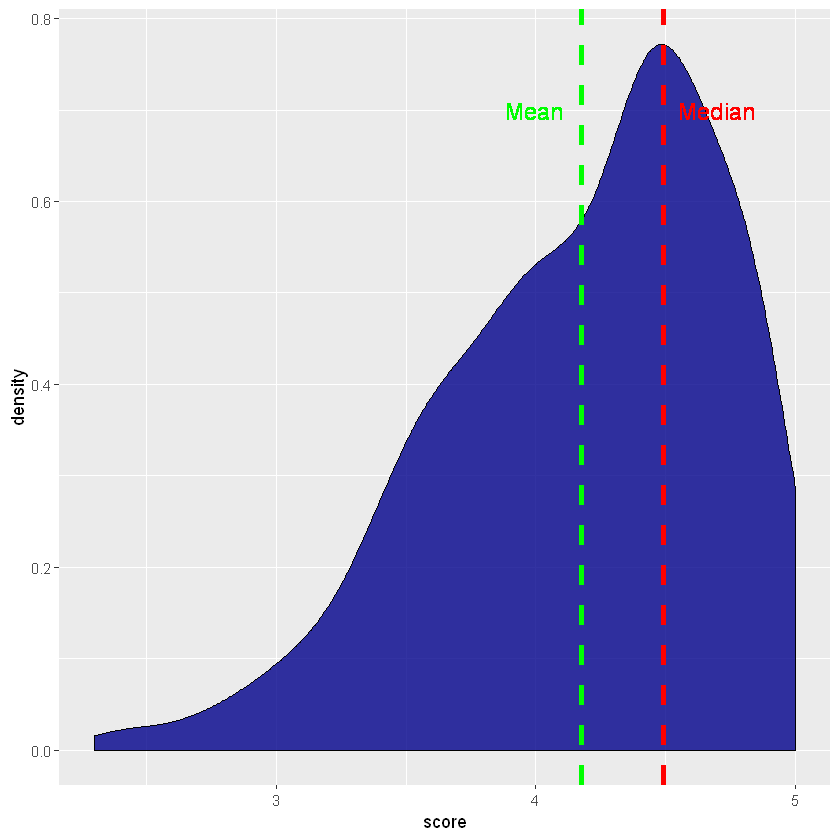

In [203]:
density_score <- density(evals$score)
ggplot(evals, aes(x=score)) +
geom_density(fill="darkblue", alpha=0.8)+
geom_vline(xintercept=4.5-0.01, linetype="dashed", size=1.5, color="red")+
geom_text(aes(x=4.7, label="Median", y=0.7), size=5, colour="red")+
geom_vline(xintercept=4.175, linetype="dashed", size=1.5, color="green")+
geom_text(aes(x=4.0, label="Mean", y=0.7), size=5, colour="green")





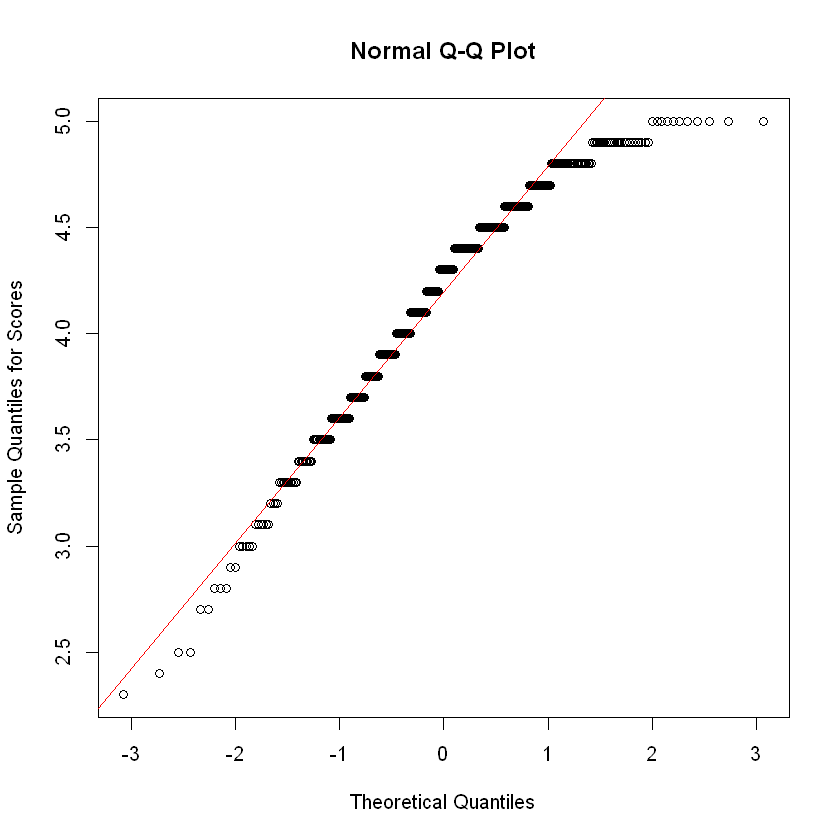

In [204]:
# Assesment of normality with quantile-quantile plot
qqnorm(evals$score,
       ylab="Sample Quantiles for Scores")
qqline(evals$score,
       col="red")

### Picking up the optimal number of bins with the Freedman_Diaconis rule

[1] "Freedman Diaconis rule for teaching scores version 1:  14"

[1] "Freedman Diaconis rule for teaching scores version 1:  13.0548167044157"

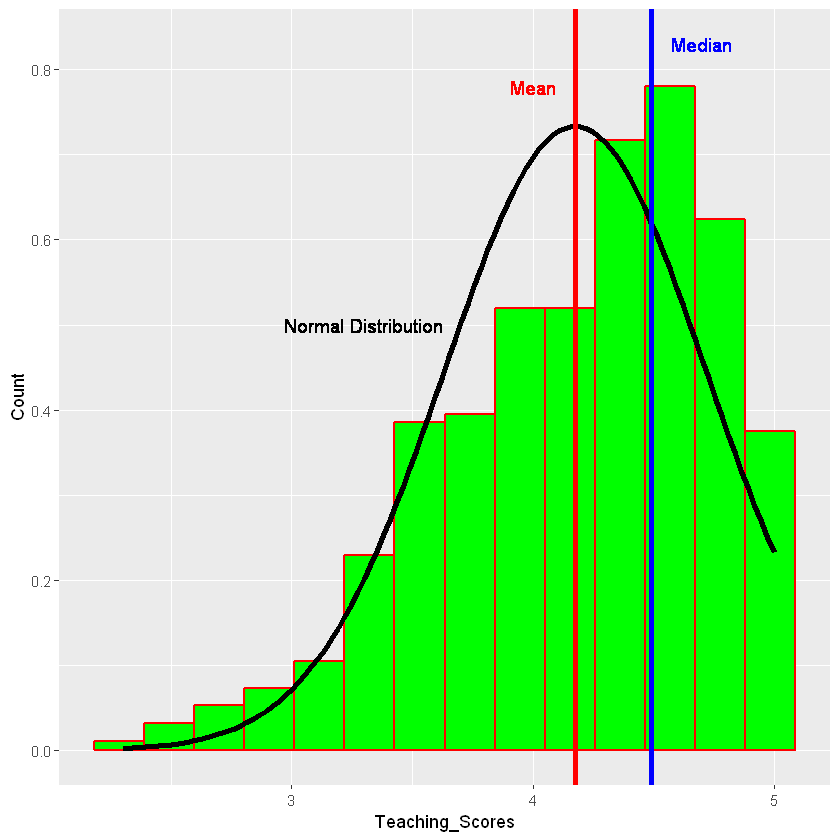

In [205]:
# If you use too few bins, the histogram doesn't really portray the data very well. 
# If you have too many bins, you get a broken comb look, which also doesn't give a sense of the distribution.
# https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram#862
# applying the Freedman-Diaconis for finding optimal number of bins
# In statistics, the Freedman–Diaconis rule can be used to select the size of the bins to be used in a histogram.
# https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

Freedman_Diaconis <- function (x) 
{
    h <- stats::IQR(x)
    if (h == 0) 
        h <- stats::mad(x, constant = 2)
    if (h > 0) 
        ceiling(diff(range(x))/(2 * h * length(x)^(-1/3)))
    else 1L
}
        
number_of_bins_score_1 <- Freedman_Diaconis(evals$score)
paste("Freedman Diaconis rule for teaching scores version 1: ", number_of_bins_score_1)

x_score =evals$score

number_of_bins_score_2 <- diff(range(x_score)) / (2 * IQR(x_score) / length(x_score)^(1/3))
paste("Freedman Diaconis rule for teaching scores version 1: ", number_of_bins_score_2)

evals %>%
ggplot(aes(x=score)) +
geom_histogram(color="red", size=0.8, fill="green", bins = number_of_bins_score_1, aes(y =..density..) ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(evals$score), sd = sd(evals$score)), color="black", size=1.5)+
geom_text(aes(x=3.3, label="Normal Distribution", y=0.5), colour="black", angle=0, size=4)+
geom_vline(xintercept=4.5-0.01, linetype="solid", size=1.5, color="blue")+
geom_text(aes(x=4.7, label="Median", y=0.83), colour="blue", angle=0, size=4)+
geom_vline(xintercept=4.175, linetype="solid", size=1.5, color="red")+
geom_text(aes(x=4.0, label="Mean", y=0.78), size=4, colour="red")
        
# distribution is left-skewed
# tail on the left
# mode > median > mean
# Transformations?
# https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
# https://stats.stackexchange.com/questions/88218/transforming-extremely-skewed-distributions
# https://www.isixsigma.com/tools-templates/normality/tips-recognizing-and-transforming-non-normal-data/

#### Trying out normalizing the data with different transformations

<p>
http://rcompanion.org/handbook/I_12.html
</p>

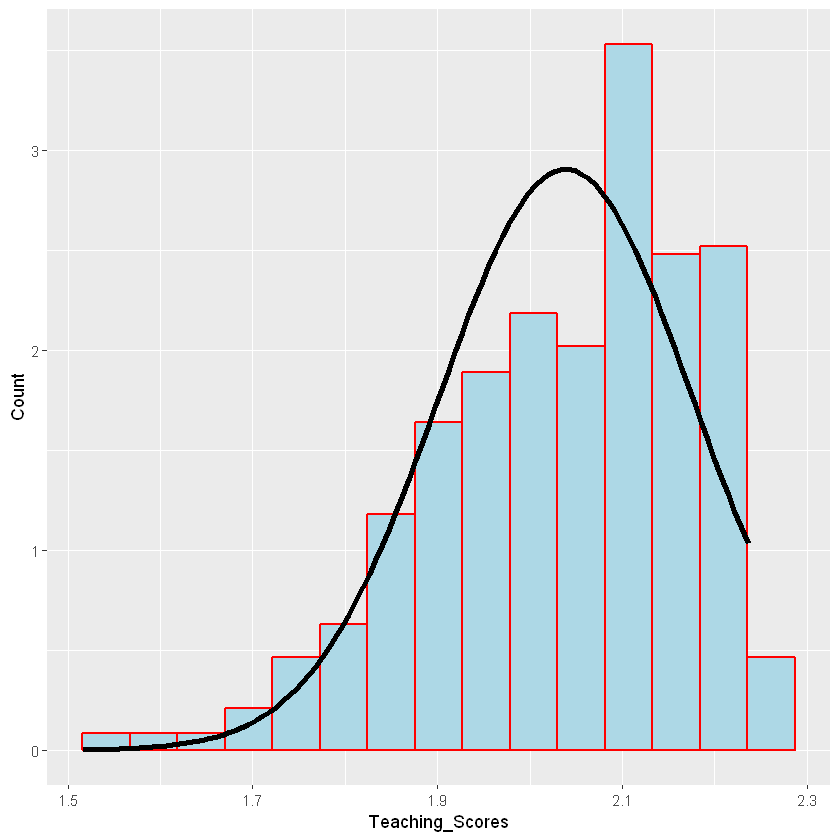

In [206]:
# square root transformation
number_of_bins_score_sqrt <- Freedman_Diaconis(sqrt(evals$score))
x_score_sqrt = sqrt(evals$score)
evals %>%
ggplot(aes(x=sqrt(score))) +
geom_histogram(color="red", size=0.8, fill="lightblue", bins = number_of_bins_score_sqrt, aes(y =..density..)  ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(x_score_sqrt), sd = sd(x_score_sqrt)), color="black", size=1.5)

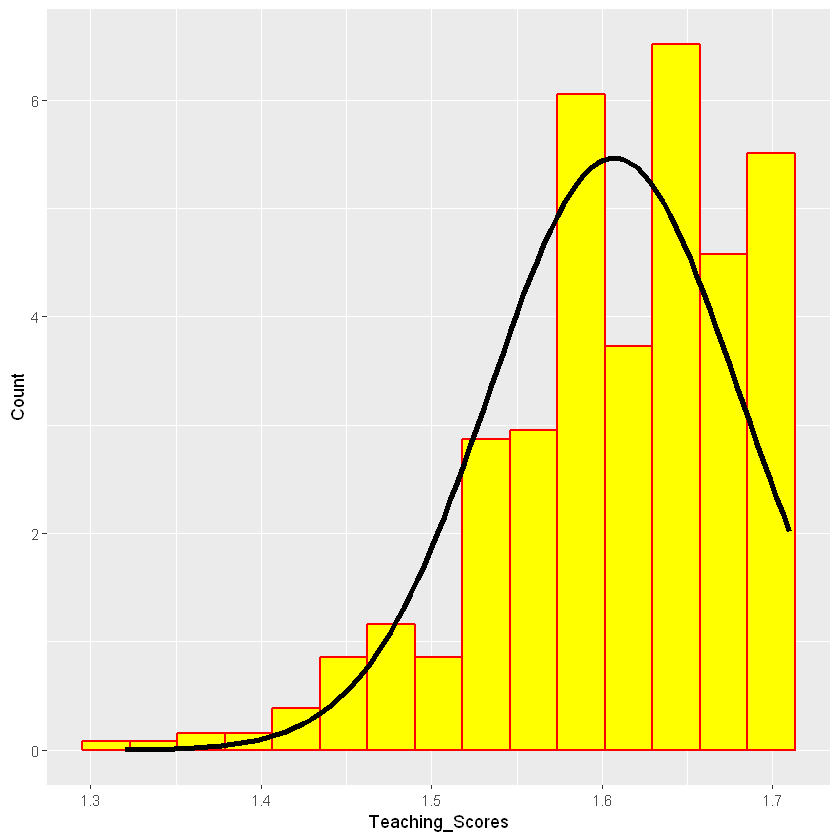

In [207]:

score_cube <- sign(evals$score) * abs(evals$score)^(1/3)

number_of_bins_score_sqrt <- Freedman_Diaconis(score_cube)

evals %>%
ggplot(aes(x=score_cube)) +
geom_histogram(color="red", size=0.8, fill="yellow", bins = number_of_bins_score_sqrt, aes(y=..density..)  ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(score_cube), sd = sd(score_cube)), color="black", size=1.5)

 

In [208]:
# Square root transformation
# Cube root t = x^(1/3)
# Reverse the square cube transformation
# the undoing of a log transformation is done with the reverse of 10^x
# cube x = t^3
# score_cube <- sign(evals$score) * abs(evals$score)^(1/3)
# More information: http://fmwww.bc.edu/repec/bocode/t/transint.html

square_cube_inverse <- score_cube^3

cube_comparisons <- 
data.frame("Primary"=evals$score, "Cube Transformed"=score_cube, "Reversed"=square_cube_inverse)

head(cube_comparisons)



Primary,Cube.Transformed,Reversed
4.7,1.675069,4.7
4.1,1.600521,4.1
3.9,1.574061,3.9
4.8,1.686865,4.8
4.6,1.663103,4.6
4.3,1.626133,4.3


[1] "ID"                    "score"                 "age"                  
 [4] "bty_avg"               "gender"                "ethnicity"            
 [7] "language"              "rank"                  "pic_outfit"           
[10] "pic_color"             "cls_did_eval"          "cls_students"         
[13] "cls_level"             "LogTransformed_Scores"

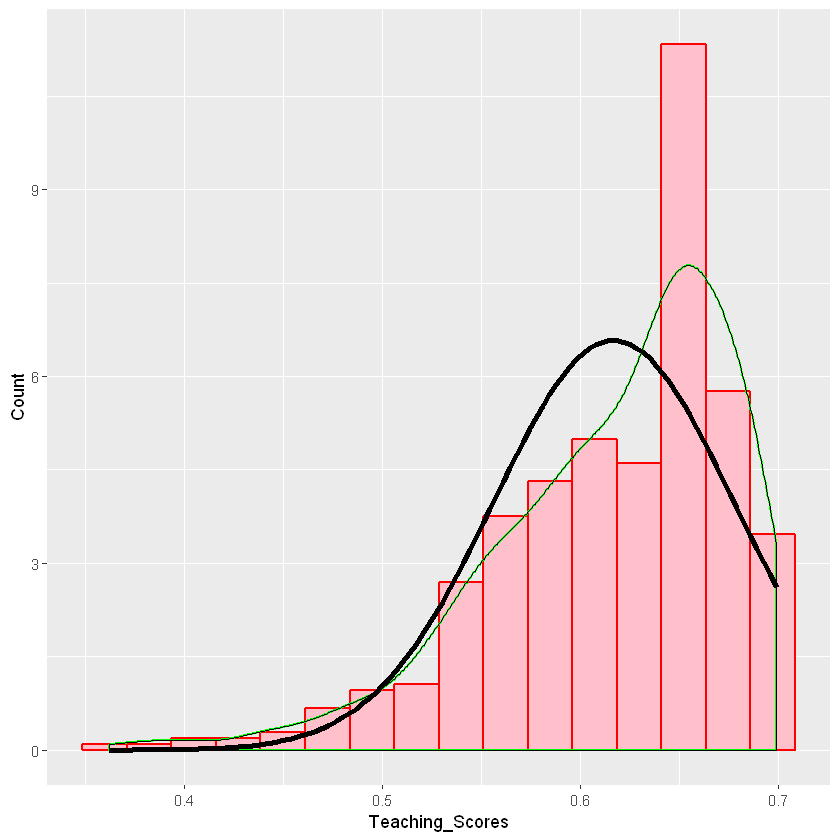

In [209]:
score_log <- log10(evals$score)
number_of_bins_score_log <- Freedman_Diaconis(score_log)



evals_LogTransformed_Scores <- 
evals %>% mutate(LogTransformed_Scores=score_log)
names(evals_LogTransformed_Scores )

LogTransformed_Scores_vector <- 
evals_LogTransformed_Scores$LogTransformed_Scores

evals_LogTransformed_Scores %>%
ggplot(aes(x=LogTransformed_Scores)) +
geom_histogram(color="red", size=0.8, fill="pink", bins = number_of_bins_score_log, aes(y=..density..) ) +
geom_density(color="green", size=0.8)+
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(LogTransformed_Scores_vector), sd = sd(LogTransformed_Scores_vector)),
              color="black", size=1.5)+ geom_density()




In [210]:
# Reverse the log transformation
# the undoing of a log transformation is done with the reverse of 10^x
score_log_undone <- 10^(score_log)


compare_score_logs <- data.frame("Logarithms of score by basis 10"= score_log, 
                                 "Logarithms reversed by exponentiation"= score_log_undone,
                                "Original values"= evals$score)

head(compare_score_logs)

Logarithms.of.score.by.basis.10,Logarithms.reversed.by.exponentiation,Original.values
0.6720979,4.7,4.7
0.6127839,4.1,4.1
0.5910646,3.9,3.9
0.6812412,4.8,4.8
0.6627578,4.6,4.6
0.6334685,4.3,4.3


In [211]:
library(utils)


install.packages("rcompanion", repos='http://cran.us.r-project.org', dependencies=TRUE)



Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'rcompanion' is in use and will not be installed"

In [212]:
install.packages('mvtnorm', repos='http://cran.us.r-project.org', dependencies=TRUE)

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'mvtnorm' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mvtnorm'"


The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\Rtmps7eLkf\downloaded_packages


#### Power transform
<p>
In statistics, a power transform is a family of functions that are applied to create 
a monotonic transformation of data using power functions. This is a useful data transformation technique 
used to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association such as the Pearson correlation between variables and for 
other data stabilization procedures. 
</p>
<a href="https://en.wikipedia.org/wiki/Power_transform",  target="_blank">Wikipedia</p>


    lambda      W Shapiro.p.value
524  3.075 0.9754       4.793e-07

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



[1] 116.60063  76.61439  65.69369 124.39898 109.13909  88.69834  23.71433
 [8]  76.61439  43.08218 102.00665

[1] 11

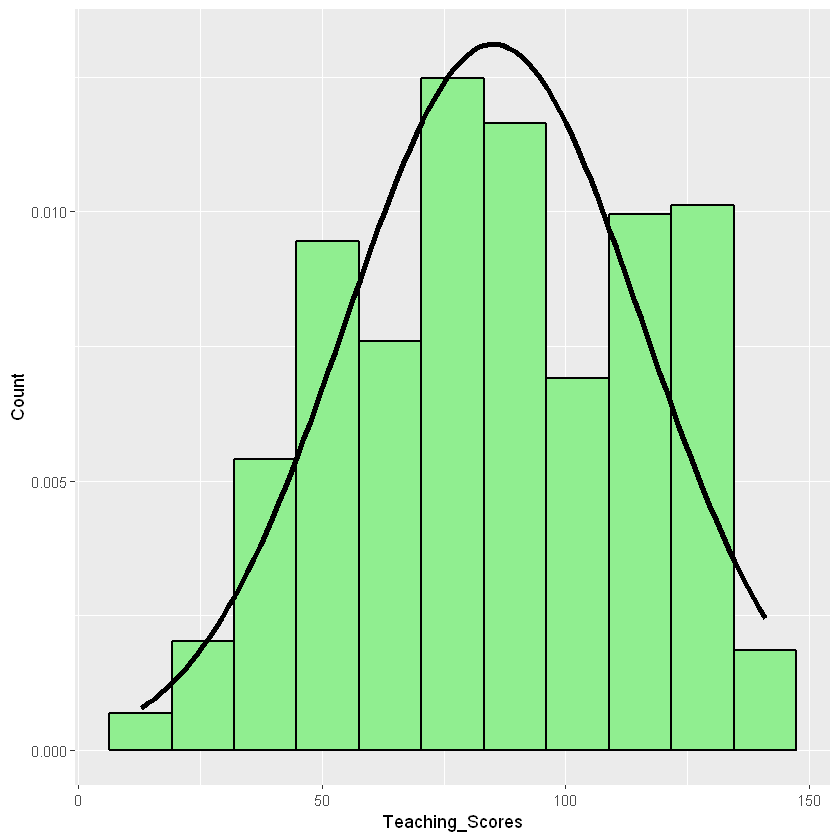

In [213]:
# Tukey’s Ladder of Powers transformation


library("rcompanion")
library(MASS)
score_T_tuk_score = transformTukey(evals$score, plotit=FALSE)
score_T_tuk_score[1:10]


number_of_bins_score_log <- Freedman_Diaconis(score_T_tuk_score)
number_of_bins_score_log

evals %>%
ggplot(aes(x=score_T_tuk_score)) +
geom_histogram(color="black", size=0.8, fill="lightgreen", bins = number_of_bins_score_log, aes(y=..density..) ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(score_T_tuk_score), sd = sd(score_T_tuk_score)), color="black", size=1.5)

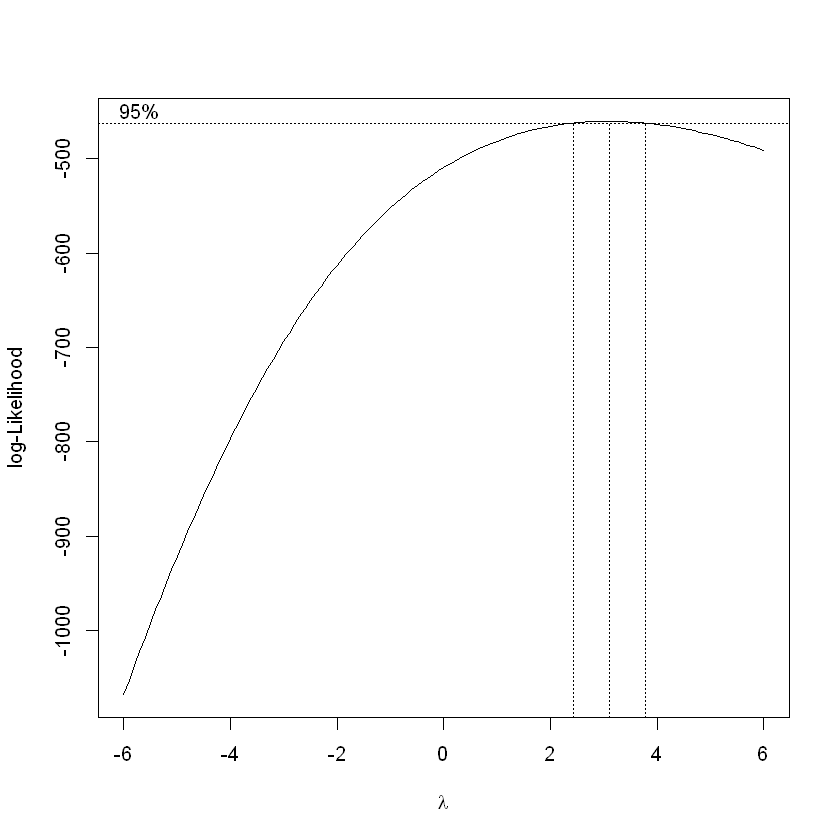

In [214]:
Box = boxcox(evals$score ~ 1,            
             lambda = seq(-6,6,0.1)      # Try values -6 to 6 by 0.1
             )

In [215]:
Cox = data.frame(Box$x, Box$y) 
# Order the new data frame by decreasing y
Cox2 = Cox[with(Cox, order(-Cox$Box.y)),]
#    log likelihood
Cox2[1,] 
# Extract that lambda
lambda = Cox2[1, "Box.x"]   
 # Transform the original data
Score_box = (evals$score^ lambda - 1)/lambda  
Score_box[1:5]

,Box.x,Box.y
92,3.1,-460.1083


[1] 38.77426 25.27909 21.60237 41.41105 36.25269

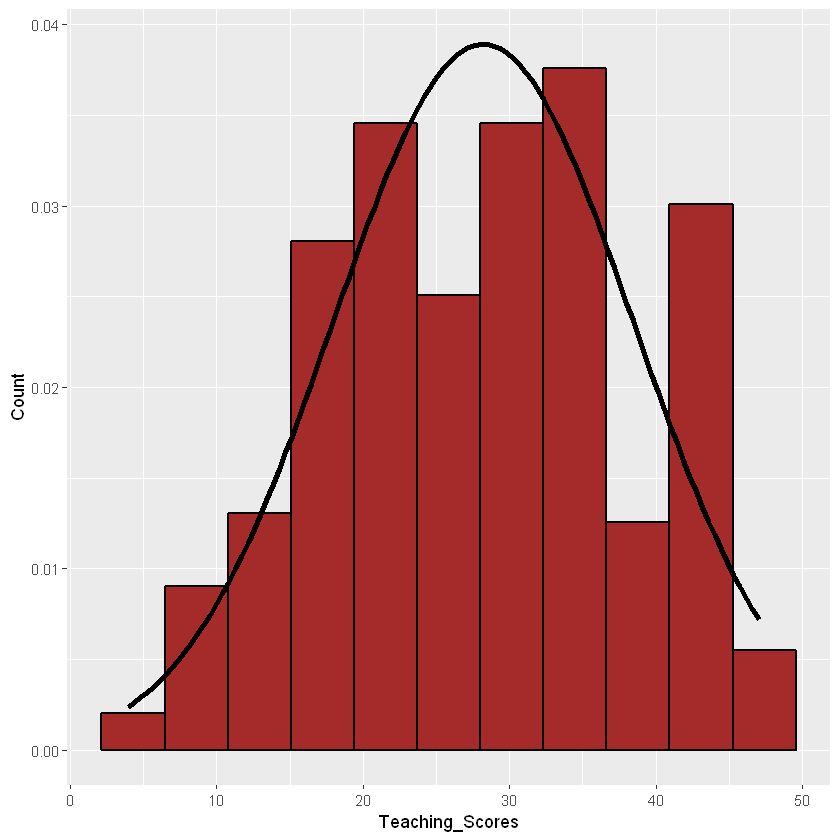

In [216]:
evals_Cox <-
evals %>% mutate(Score_box=Score_box)


evals_Cox %>%
ggplot(aes(x=Score_box)) +
geom_histogram(color="black", size=0.8, fill="brown", bins = number_of_bins_score_log, aes(y=..density..) ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(Score_box), sd = sd(Score_box)), color="black", size=1.5)

#### Compute summary statistics of teaching scores

In [217]:

evals %>%
summarize(mean_score=mean(score),
          median_score=median(score),
          standard_deviation_score=sd(score),
          maximum=max(score),
          minimum=min(score))

mean_score,median_score,standard_deviation_score,maximum,minimum
4.17473,4.3,0.5438645,5,2.3


#### Univariate EDA of the age variable

In [218]:
#  Look at the data age of professor

glimpse(evals$age)
unique(evals$age)
class(evals$age)
table(evals$age)

 int [1:463] 36 36 36 36 59 59 59 51 51 40 ...


[1] 36 59 51 40 31 62 33 47 35 37 42 49 45 56 48 46 57 52 29 64 34 58 73 70 41
[26] 63 39 54 44 60 61 50 38 32 43

[1] "integer"


29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 54 56 57 
 1  6 11 23 11 12  4 10 17 10  8  1 22 25  4 10  9 41  8  7 19 19 47  8  8 28 
58 59 60 61 62 63 64 70 73 
14  3 18  6 25  7 13  4  4 

[1] 36 59 51 40 31 62 33 47 35 37 42 49 45 56 48 46 57 52 29 64 34 58 73 70 41
[26] 63 39 54 44 60 61 50 38 32 43

[1] "Freedman Diaconis rule for teaching scores version 1:  12"

[1] 463

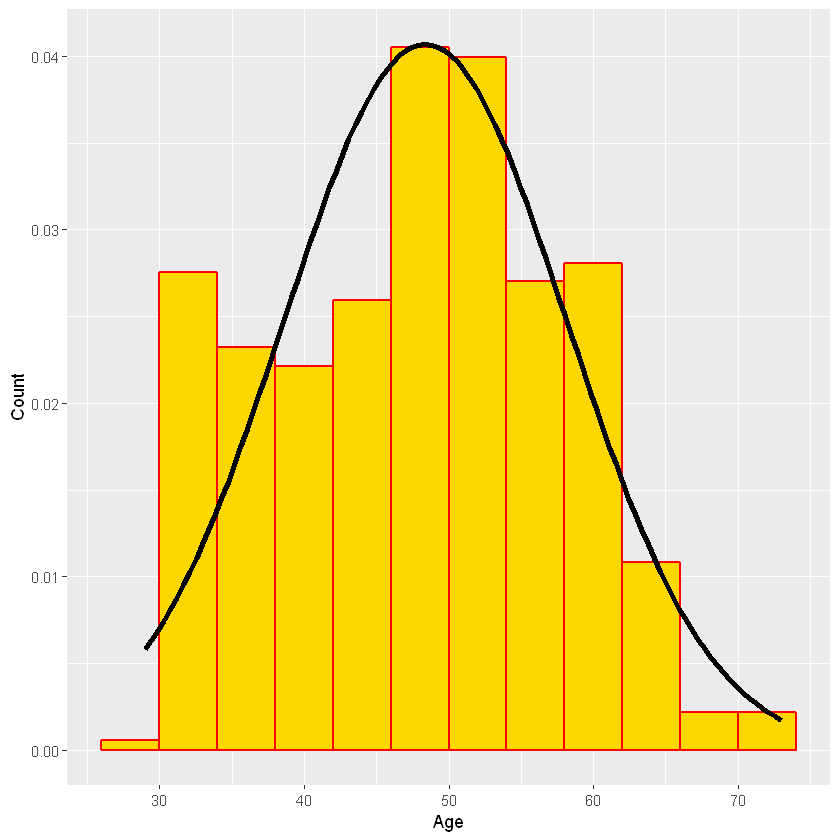

In [219]:
# Age of professor
unique(evals$age)
number_of_bins_score_age <- Freedman_Diaconis(evals$age)
paste("Freedman Diaconis rule for teaching scores version 1: ", number_of_bins_score_age)
length_age <- length(evals$age)
length_age
evals %>%
ggplot(aes(x=age)) +
geom_histogram(color="red", size=0.8, fill="gold", bins = number_of_bins_score_age, aes(y=..density..) ) +
labs(x="Age", y="Count")+
stat_function(fun=dnorm, args=list(mean=mean(evals$age), sd=sd(evals$age)), color="black", size=1.5)


In [220]:
# Summary statistics

evals %>%
summarize(mean_score=mean(age),
          median_score=median(age),
          standard_deviation_score=sd(age),
          maximum=max(age),
          minimum=min(age))

mean_score,median_score,standard_deviation_score,maximum,minimum
48.36501,48,9.802742,73,29


#### Bivariate EDA of the relationship between age and teaching scores

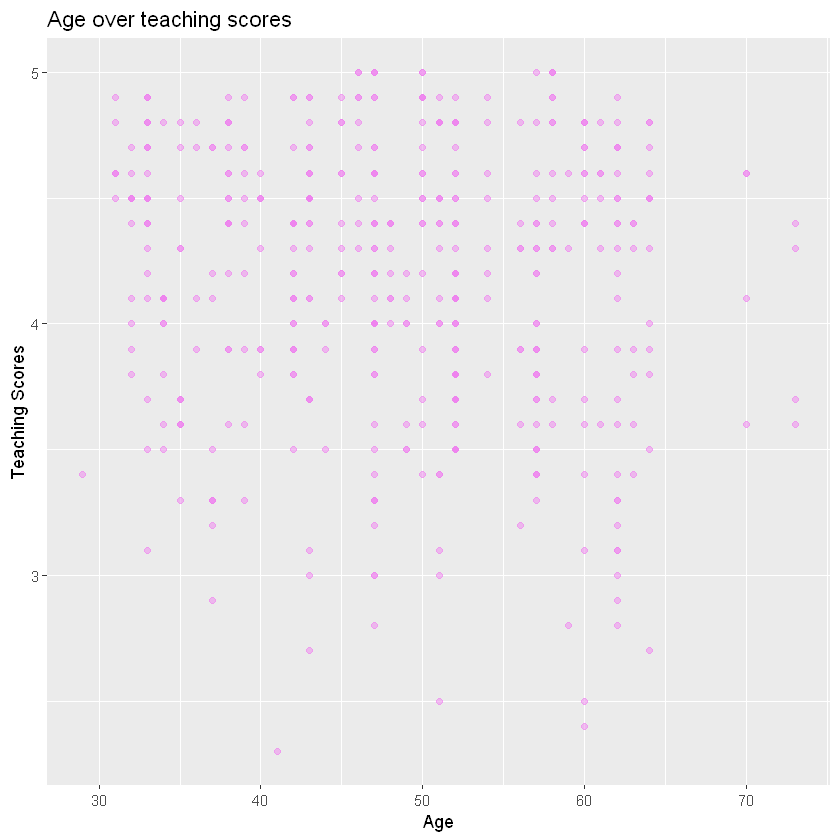

In [221]:
ggplot(evals, aes(x=age, y=score)) +
geom_point(color="violet", alpha=0.5, na.rm=TRUE)+
labs(x="Age", y="Teaching Scores", title="Age over teaching scores")
# Is there a relationship between age and teaching scores?
# No, the data points are evenly distributed

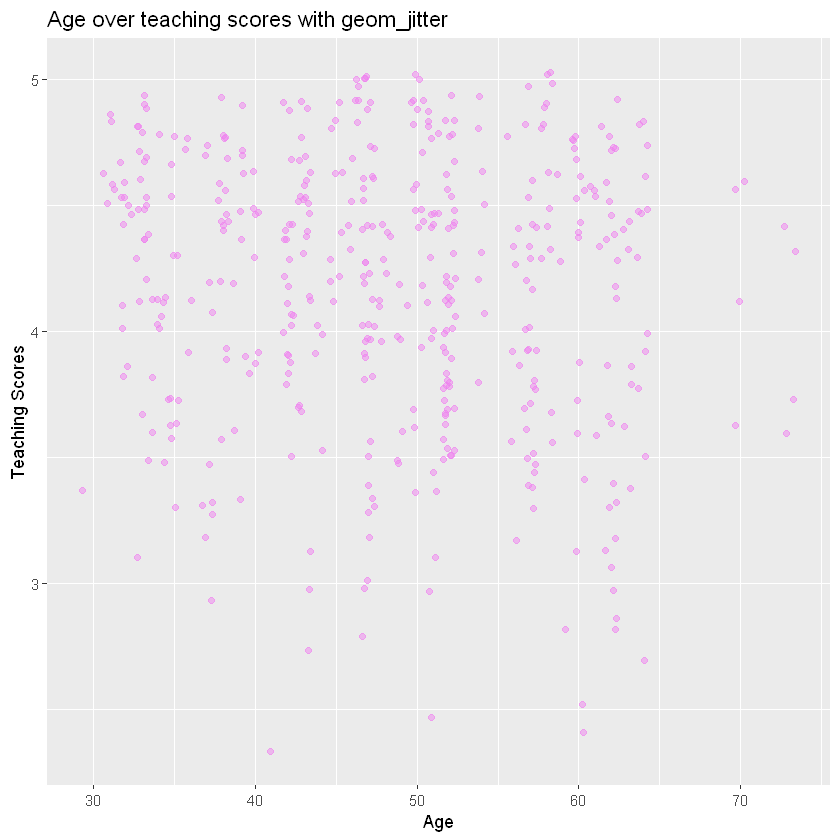

In [222]:
# Overplotting?
ggplot(evals, aes(x=age, y=score)) +
geom_jitter(color="violet", alpha=0.5, na.rm=TRUE)+
labs(x="Age", y="Teaching Scores", title="Age over teaching scores with geom_jitter")
# Is there a relationship between age and teaching scores?
# No, it seems the data points are evenly distributed

In [223]:
evals %>% summarize(Correlation_age_scores=cor(age, score))
# the relationship between age and teaching scores is very weakly negative
# the older the lower the teaching scores

Correlation_age_scores
-0.107032


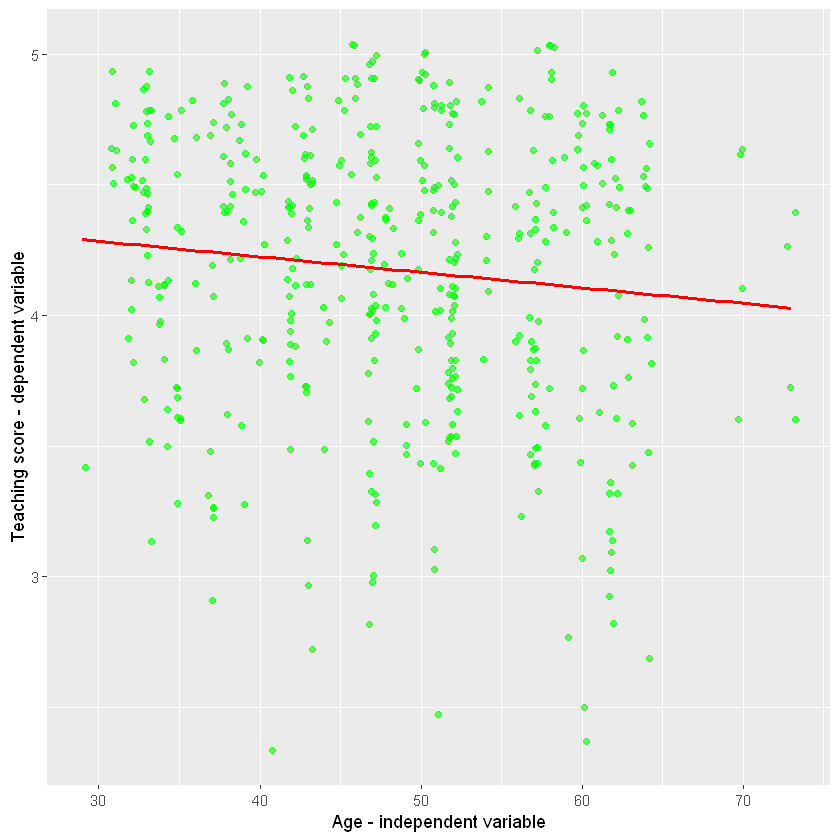

In [224]:
# visualizing the relationship age and teach scores with a regression line
# x: age - independent variable
# y: score - dependent variable

plot_age_score_reg <- 
evals %>% ggplot(aes(x=age,y=score))+
geom_jitter(alpha=0.6, width=0.3, color="green")+
geom_smooth(method="lm", se=FALSE, color="red", size=1)+
labs(x="Age - independent variable", y="Teaching score - dependent variable")

plot_age_score_reg 

In [225]:
# simple linear regression model of the bivariate relationship between age and scores

reg_score_age <- 
lm(score~age, data=evals)

reg_score_age
summary(reg_score_age)

# When age is 0 the beauty score is 4.461932
# (given all other variables are not changing)
# Meaning every teacher has on average a beauty score of 4.461932 independent of the age
# for every unit of age (month) teaching scores decrease by -0.005938
# 0-hypothesis: a relationship between teaching score and age exists not
# Alternative hypothesis: a relationship between teaching score and age exists
# Given a significant level of 0.05 and a p-value below of 0.0213
# age influences the teaching scores
# The 0-hypothesis is rejected, and the alternative hypothesis is not rejected
# the slope of age is with -0.005938 slightly negative
# Assumption: as age increases scores decrease


Call:
lm(formula = score ~ age, data = evals)

Coefficients:
(Intercept)          age  
   4.461932    -0.005938  



Call:
lm(formula = score ~ age, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9185 -0.3531  0.1172  0.4172  0.8825 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.461932   0.126778  35.195   <2e-16 ***
age         -0.005938   0.002569  -2.311   0.0213 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5413 on 461 degrees of freedom
Multiple R-squared:  0.01146,	Adjusted R-squared:  0.009311 
F-statistic: 5.342 on 1 and 461 DF,  p-value: 0.02125


In [226]:
# using get_regression_table from moderndive instead of summary
get_regression_table(reg_score_age)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,4.462,0.127,35.195,0.000,4.213,4.711
age,-0.006,0.003,-2.311,0.021,-0.011,-0.001


#### Building regression models and using metrics (rmse, RSS and R-squared) for model assesment

In [227]:
# regression model: reg_score_age
# predict teaching score with the model
# model: independent variable is age, dependent variable is teaching score
# building a linear regression models means finding the explanatory and response variables

pred_score_age <-
predict(reg_score_age)

# Residual = Observed value - Predicted value 
df_model_score_age <- 
data.frame(Actual_teaching_scores=evals$score, 
           Predicted_scores=pred_score_age
           )%>% 
mutate(Residuals=Actual_teaching_scores-Predicted_scores)


head(df_model_score_age)
glimpse(df_model_score_age)

# Creating a similar table with get_regression
head(get_regression_points(reg_score_age))


Actual_teaching_scores,Predicted_scores,Residuals
4.7,4.248156,0.4518438
4.1,4.248156,-0.1481562
3.9,4.248156,-0.3481562
4.8,4.248156,0.5518438
4.6,4.111577,0.4884229
4.3,4.111577,0.1884229


Observations: 463
Variables: 3
$ Actual_teaching_scores <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4,...
$ Predicted_scores       <dbl> 4.248156, 4.248156, 4.248156, 4.248156, 4.11...
$ Residuals              <dbl> 0.45184376, -0.14815624, -0.34815624, 0.5518...


ID,score,age,score_hat,residual
1,4.7,36,4.248,0.452
2,4.1,36,4.248,-0.148
3,3.9,36,4.248,-0.348
4,4.8,36,4.248,0.552
5,4.6,59,4.112,0.488
6,4.3,59,4.112,0.188


In [228]:
# Model assesment

rmse_scores_age <- 
rmse(df_model_score_age$Actual_teaching_scores, df_model_score_age$Predicted_scores )

paste("Root Mean Square Error (of the simple linear regression model predicting teaching scores with age): ", 
      round(rmse_scores_age, 2))


# Interpretation: on average every prediction of a teaching score has a difference of 0.54 teaching scores
# from the actual teaching score.

# Sum of residuals squared

RSS_reg_score_age <-
get_regression_points(reg_score_age)  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

paste("RSS: ", RSS_reg_score_age)



#R_squared_reg_model_price_yr_calculated <- 1- RSS_reg_model_price_yr_sf / TSS_squared_reg_model_price_yr 

# TSS_squared_reg_model_price_yr <-  sum((housesales_none_33$log10_prices - mean(housesales_none_33$log10_prices))^2)
TSS_evals_scores <- sum((evals$score  - mean(evals$score ))^2)

R_squared_evals_scores_age <-
1- RSS_reg_score_age / TSS_evals_scores

paste("R-squared_adjusted_extracted: ", summary(reg_score_age)$adj.r.squared)
paste("R-squared_calculated: ", R_squared_evals_scores_age)

summary(reg_score_age)


[1] "Root Mean Square Error (of the simple linear regression model predicting teaching scores with age):  0.54"

[1] "RSS:  135.075843"

[1] "R-squared_adjusted_extracted:  0.00931149520785357"

[1] "R-squared_calculated:  0.0115510289554641"


Call:
lm(formula = score ~ age, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9185 -0.3531  0.1172  0.4172  0.8825 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.461932   0.126778  35.195   <2e-16 ***
age         -0.005938   0.002569  -2.311   0.0213 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5413 on 461 degrees of freedom
Multiple R-squared:  0.01146,	Adjusted R-squared:  0.009311 
F-statistic: 5.342 on 1 and 461 DF,  p-value: 0.02125


#### Writing two functions calculating RSS and R-squared

In [229]:
# Calculating two functions


# Writing a function calculating the Residual Sum of Square

    
RSS_calc_fun <-  function(regression_model) {
    
    
    RSS <- get_regression_points(regression_model)  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
    # Sum of residuals squared
    RSS <- as.numeric(RSS)
    return(RSS)

} 

RSS_reg_score_age_fun <- 
RSS_calc_fun(regression_model=reg_score_age)
class(RSS_reg_score_age_fun)
RSS_reg_score_age_fun 


paste("RSS: ", RSS_calc_fun(regression_model=reg_score_age))

# Writing a function calculating the R-squared

R_squared_calc <- function(regression_model, dependent_variable){
    
    RSS <- get_regression_points(regression_model)  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
    
    RSS <- as.numeric(RSS)
    # Total sum of square
    Deviation_Mean <- (dependent_variable - mean(dependent_variable))^2
    TSS <- sum(Deviation_Mean)
    
    R_squared <- 1- RSS / TSS
    
    return(R_squared)
}

R_squared_reg_score_age <-
R_squared_calc(regression_model=reg_score_age, dependent_variable=evals$score)

paste("R-Squared: ", R_squared_reg_score_age)

[1] "numeric"

[1] 135.0758

[1] "RSS:  135.075843"

[1] "R-Squared:  0.0115510289554641"

In [230]:
reg_model_score_bty <- lm(score~bty_avg, data=evals)
get_regression_table(reg_model_score_bty)

# predict values with equation
# bty_average = 4
pred_bty_average_4 = 3.880 + 0.067*4
pred_bty_average_4

# predict values with equation over byt_avg column
get_regression_points(reg_model_score_bty ) %>%
mutate(score_hat_2 = 3.88 + 0.067 * bty_avg) %>%
head()

pred_reg_model_score_bty  <-  predict(reg_model_score_bty)
rmse(evals$score,pred_reg_model_score_bty )

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,3.880,0.076,50.961,0,3.731,4.030
bty_avg,0.067,0.016,4.090,0,0.035,0.099


[1] 4.148

ID,score,bty_avg,score_hat,residual,score_hat_2
1,4.7,5,4.214,0.486,4.215
2,4.1,5,4.214,-0.114,4.215
3,3.9,5,4.214,-0.314,4.215
4,4.8,5,4.214,0.586,4.215
5,4.6,3,4.080,0.520,4.081
6,4.3,3,4.080,0.220,4.081


[1] 0.5336787

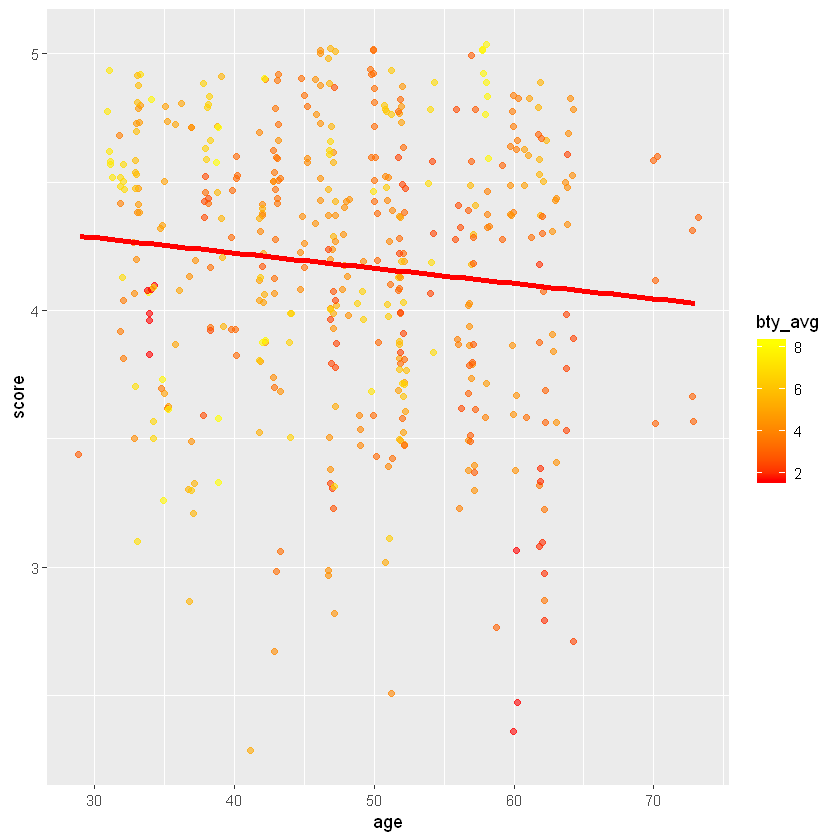

In [231]:
# visualizing the relationship age and teach scores with a regression line
# x: age - independent variable
# y: score - dependent variable
# group by beauty scores

plot_age_score_reg_by_beauty <- 
evals %>% ggplot(aes(x=age,y=score, color=bty_avg))+
geom_jitter(alpha=0.6, width=0.3)+
geom_smooth(method="lm", se=FALSE, color="red", size=1.5)+
scale_color_gradient( low = "red", high = "yellow")

plot_age_score_reg_by_beauty

In [232]:
reg_score_age_beauty <- 
lm(score ~ age + bty_avg, data=evals)

reg_score_age_beauty
get_regression_table(reg_score_age_beauty)
summary(reg_score_age_beauty)

# forr every increase in unit of beauty average teaching scores are increasing by 0.060656
# given all other variables are not changing
# 0-hypothesis: a relationship between teaching score and age exists not
# 0-hypothesis: a relationship between teaching score and beauty score exists not
# Alternative hypothesis: a relationship between teaching score and age exists
# Alternative hypothesis: a relationship between teaching score and beauty score exists
# Given a significant level of 0.05 and a p-value below of 0.251396 age influences the teaching scores
# Given a significant level of 0.05 and a p-value below of  0.000429 beauty average influences the teaching scores
# The 0-hypothesis is rejected, and the alternative hypothesis is not rejected

# Are interaction effects ocurring?


Call:
lm(formula = score ~ age + bty_avg, data = evals)

Coefficients:
(Intercept)          age      bty_avg  
   4.054732    -0.003059     0.060656  


term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,4.055,0.170,23.870,0.000,3.721,4.389
age,-0.003,0.003,-1.148,0.251,-0.008,0.002
bty_avg,0.061,0.017,3.548,0.000,0.027,0.094



Call:
lm(formula = score ~ age + bty_avg, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9427 -0.3474  0.1293  0.3957  0.9478 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.054732   0.169865  23.870  < 2e-16 ***
age         -0.003059   0.002664  -1.148 0.251396    
bty_avg      0.060656   0.017098   3.548 0.000429 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5347 on 460 degrees of freedom
Multiple R-squared:  0.03778,	Adjusted R-squared:  0.0336 
F-statistic: 9.031 on 2 and 460 DF,  p-value: 0.0001422


In [233]:
# model: reg_score_age_beauty

pred_model_reg_score_age_beauty <-
predict(reg_score_age_beauty)

df_pred_model_reg_score_age_beauty <- 
data.frame(Actual_values=evals$score,  Predictions= pred_model_reg_score_age_beauty ) %>%
mutate(Residuals = Actual_values-Predictions )

head(df_pred_model_reg_score_age_beauty)

# Creating a similar table with get_regression
head(get_regression_points(reg_score_age))

rmse_pred_model_reg_score_age_beauty <- 
rmse(df_pred_model_reg_score_age_beauty$Actual_values, df_pred_model_reg_score_age_beauty$Predictions)


paste("Root Mean Square Error of the simple linear regression model predicting teaching scores with age and beauty: ", 
      round(rmse_pred_model_reg_score_age_beauty, 2))

# Conclusion: this model delivers an improved rmse of 0.53
# 0.1 better than the model only based on age


Actual_values,Predictions,Residuals
4.7,4.247871,0.4521287
4.1,4.247871,-0.1478713
3.9,4.247871,-0.3478713
4.8,4.247871,0.5521287
4.6,4.056192,0.5438079
4.3,4.056192,0.2438079


ID,score,age,score_hat,residual
1,4.7,36,4.248,0.452
2,4.1,36,4.248,-0.148
3,3.9,36,4.248,-0.348
4,4.8,36,4.248,0.552
5,4.6,59,4.112,0.488
6,4.3,59,4.112,0.188


[1] "Root Mean Square Error of the simple linear regression model predicting teaching scores with age and beauty:  0.53"

In [234]:
# Making predictions with new data

reg_score_age_beauty <- 
lm(score ~ age + bty_avg, data=evals)

evals %>% summarize(Minbty_avgimum_age = min(age),
                    Maximum_age=max(age))

evals %>% summarize(Minimum_bty_avg = min(bty_avg),
                    Maximum_bty_avg=max(bty_avg))

# Generate random data within the boundaries given by observed min and max
random_age <-
floor(runif(10, min=29, max=74))

random_beatuy <-
runif(10, min=1.6, max=8.2)

new_data_67563 <-
data_frame(age=random_age,
           bty_avg=random_beatuy)

dim(new_data_67563)


predict_age_beauty_nd <-
predict(reg_score_age_beauty, newdata=new_data_67563 )
length(predict_age_beauty_nd)

predict_age_beauty_nd_absolute <-
10^predict_age_beauty_nd 
length(predict_age_beauty_nd_absolute )

predict_age_beauty_nd_df <-
cbind(new_data_67563 , predict_age_beauty_nd, predict_age_beauty_nd_absolute)

predict_age_beauty_nd_df


Minbty_avgimum_age,Maximum_age
29,73


Minimum_bty_avg,Maximum_bty_avg
1.667,8.167


[1] 10  2

[1] 10

[1] 10

age,bty_avg,predict_age_beauty_nd,predict_age_beauty_nd_absolute
66,5.311958,4.175010,14962.702
62,6.877355,4.282198,19151.309
62,3.301291,4.065289,11622.213
73,4.262111,4.089914,12300.263
69,5.230197,4.160872,14483.461
58,1.891562,3.992018,9817.889
55,6.519822,4.281928,19139.392
35,8.117058,4.439999,27542.222
39,3.313422,4.136392,13689.638
47,7.327927,4.355420,22668.359


In [235]:
reg_score_age_beauty_interaction <- 
lm(score ~ age * bty_avg, data=evals)

get_regression_table(reg_score_age_beauty_interaction )
reg_score_age_beauty_interaction 
summary(reg_score_age_beauty_interaction )

# An interaction effect between beauty average and age exists
# Assumptions:
# A age increases beauty decreases and then teaching scores decrease
# While this is assumed, beauty average remains a variable with influence
# Conclusion: the interaction effect between beauty average and age should be
# included in the model, but also beauty average as an independent variable

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,5.156,0.368,14.019,0.000,4.433,5.879
age,-0.026,0.007,-3.559,0.000,-0.041,-0.012
bty_avg,-0.188,0.076,-2.480,0.013,-0.337,-0.039
age:bty_avg,0.005,0.002,3.366,0.001,0.002,0.008



Call:
lm(formula = score ~ age * bty_avg, data = evals)

Coefficients:
(Intercept)          age      bty_avg  age:bty_avg  
   5.156077    -0.026128    -0.187800     0.005318  



Call:
lm(formula = score ~ age * bty_avg, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9410 -0.3517  0.1231  0.4040  1.0066 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.156077   0.367797  14.019  < 2e-16 ***
age         -0.026128   0.007342  -3.559 0.000412 ***
bty_avg     -0.187800   0.075724  -2.480 0.013494 *  
age:bty_avg  0.005318   0.001580   3.366 0.000827 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5287 on 459 degrees of freedom
Multiple R-squared:  0.06096,	Adjusted R-squared:  0.05482 
F-statistic: 9.933 on 3 and 459 DF,  p-value: 2.349e-06


In [236]:
# reg_score_age_beauty_interaction

pred_reg_score_age_beauty_interaction <-
predict(reg_score_age_beauty_interaction)

df_model_reg_score_age_beauty_interaction <-
data.frame(Actual=evals$score, Predictions=pred_reg_score_age_beauty_interaction)%>%
mutate(Residuals=Actual-Predictions)

head(df_model_reg_score_age_beauty_interaction )
head(get_regression_points(reg_score_age_beauty_interaction))

rmse_df_model_reg_score_age_beauty_interaction <-
rmse(df_model_reg_score_age_beauty_interaction$Actual,
     df_model_reg_score_age_beauty_interaction$Predictions)

paste("Root Mean Square Error of the simple linear regression model predicting teaching scores with age and beauty considering interaction effects: ", 
      round(rmse_df_model_reg_score_age_beauty_interaction, 2))

# Considering interaction effects did not improve the model

Actual,Predictions,Residuals
4.7,4.233637,0.4663634
4.1,4.233637,-0.1336366
3.9,4.233637,-0.3336366
4.8,4.233637,0.5663634
4.6,3.992333,0.6076673
4.3,3.992333,0.3076673


ID,score,age,bty_avg,score_hat,residual
1,4.7,36,5,4.234,0.466
2,4.1,36,5,4.234,-0.134
3,3.9,36,5,4.234,-0.334
4,4.8,36,5,4.234,0.566
5,4.6,59,3,3.992,0.608
6,4.3,59,3,3.992,0.308


[1] "Root Mean Square Error of the simple linear regression model predicting teaching scores with age and beauty considering interaction effects:  0.53"

#### Categorical variables like gender and rank as predictor variables

gender,n,Proportions,Median,Mean,Quantile_25,Quantile_75,Standard_Deviation,IQR
female,195,0.4211663,4.1,4.092821,3.7,4.5,0.5638141,0.8
male,268,0.5788337,4.3,4.234328,3.9,4.6,0.5218958,0.7


Observations: 2
Variables: 9
$ gender             <fct> female, male
$ n                  <int> 195, 268
$ Proportions        <dbl> 0.4211663, 0.5788337
$ Median             <dbl> 4.1, 4.3
$ Mean               <dbl> 4.092821, 4.234328
$ Quantile_25        <dbl> 3.7, 3.9
$ Quantile_75        <dbl> 4.5, 4.6
$ Standard_Deviation <dbl> 0.5638141, 0.5218958
$ IQR                <dbl> 0.8, 0.7


[1] "tbl_df"     "tbl"        "data.frame"

Median
4.1


[1] 463

Mean
0.1415078


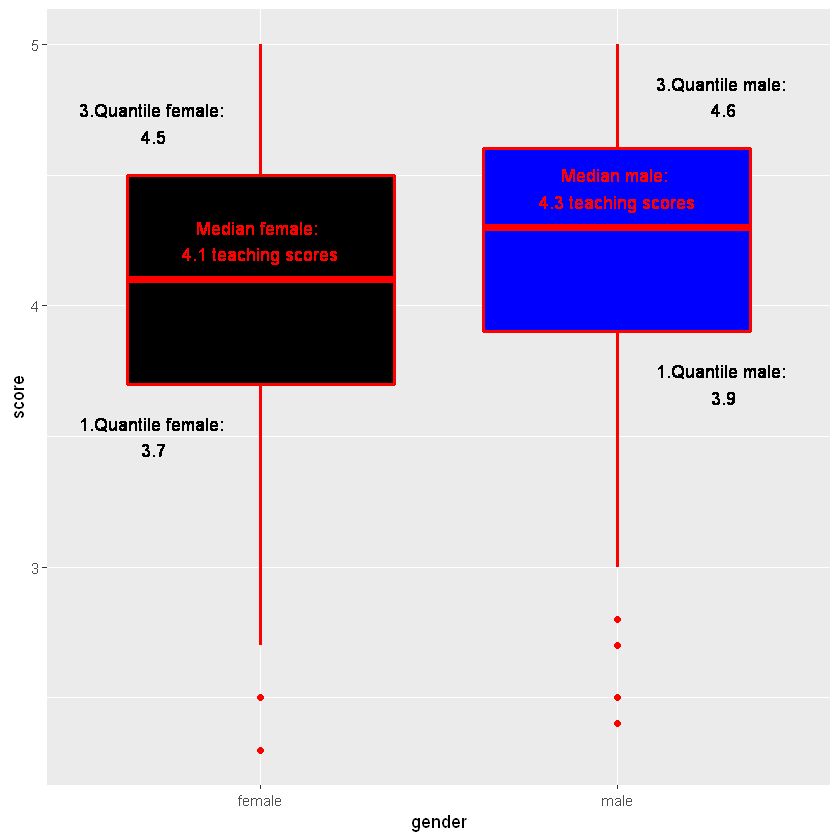

In [237]:
# Investigating the relationship between gender and scores
# Boxplot score over gender

statistics_scores_by_gender <- 
evals %>% group_by(gender) %>% summarize(n=n(), 
                                         Proportions=n/length(evals$gender),
                                         Median=median(score), 
                                         Mean = mean(score),
                                         Quantile_25=quantile(score, probs=c(0.25)),
                                         Quantile_75=quantile(score, probs=c(0.75)),
                                         Standard_Deviation = sd(score),
                                         IQR=Quantile_75-Quantile_25
                                         )


evals %>% ggplot(aes(x=gender, y=score))+
geom_boxplot(color="red", size=1, fill=c("black","blue"))+
geom_text(x=1, y=4.25, label=paste("Median female: \n4.1 teaching scores" ), color="red")+
geom_text(x=2, y=4.45, label=paste("Median male: \n4.3 teaching scores" ), color="red")+
geom_text(x=0.7, y=3.5, label=paste("1.Quantile female: \n3.7" ), color="black")+
geom_text(x=0.7, y=4.7, label=paste("3.Quantile female: \n4.5" ), color="black")+
geom_text(x=2.3, y=3.7, label=paste("1.Quantile male: \n3.9" ), color="black")+
geom_text(x=2.3, y=4.8, label=paste("3.Quantile male: \n4.6" ), color="black")

statistics_scores_by_gender


glimpse(statistics_scores_by_gender)
class(statistics_scores_by_gender)
statistics_scores_by_gender[1, "Median"]
length(evals$gender)

# mean difference between male and female is the slope of the regression line of score by gender
# men teaching scores differ on average by 0.1415078 from women
# For every data point men scores are 0.1415078 higher than women scores
# In case of categorical variables the group means are the predictions.

mean_difference <- statistics_scores_by_gender[2, "Mean"] - statistics_scores_by_gender[1, "Mean"]
mean_difference 

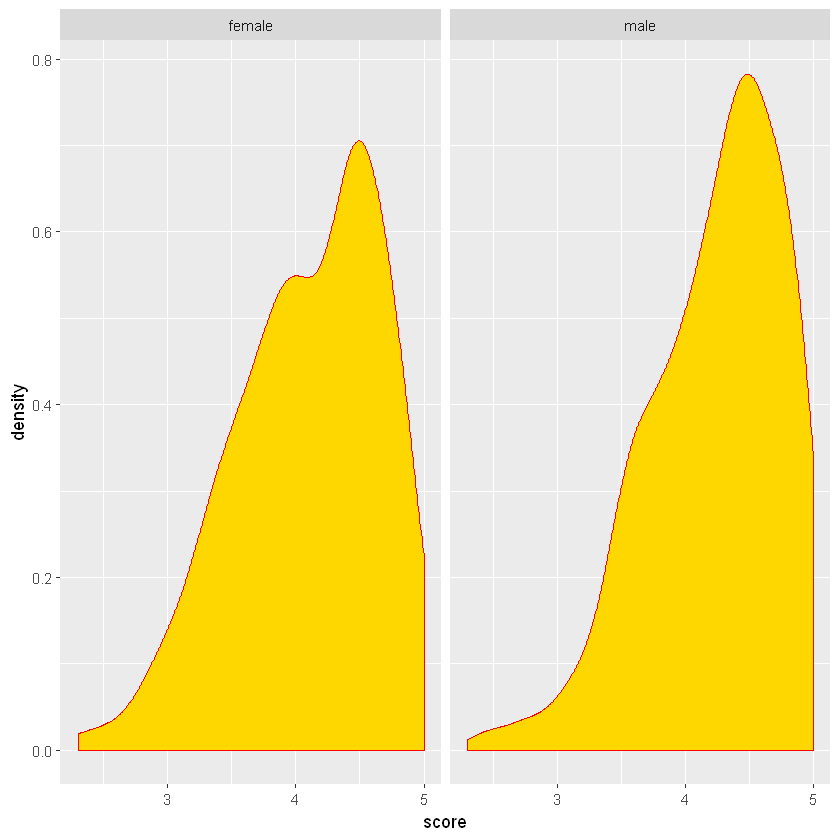

In [238]:
# Distributions of gender by female and male

evals %>% ggplot(aes(x=score))+geom_density(fill="gold", color="red")+facet_wrap(.~gender)

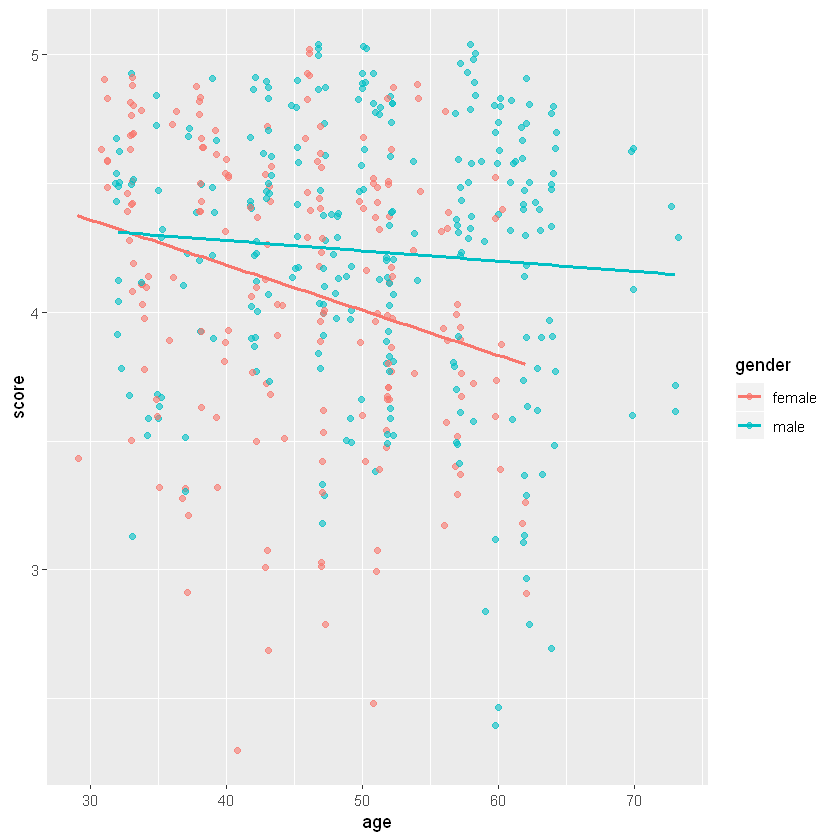

In [239]:
# linear regression lines plotted by gender

plot_age_score_reg_by_gender_reg <-
evals %>% ggplot(aes(x=age,y=score, color=gender))+
geom_jitter(alpha=0.6, width=0.3)+
geom_smooth(method="lm", aes(color= gender ), se=FALSE)
plot_age_score_reg_by_gender_reg

# Interpretation: 
# it seems gender influences teaching scores
# teaching scores decreasing faster for females than males, when age increases

In [240]:
# regression scores by gender

reg_model_sc_gen <-
lm(score~gender, evals)

get_regression_table(reg_model_sc_gen )

reg_model_sc_gen_points <- 
get_regression_points(reg_model_sc_gen )

head(reg_model_sc_gen_points)

rmse(evals$score, reg_model_sc_gen_points$residual)

# In case of categorical variables the group means are the predictions.
# The prediction for a female teaching score is in this model 4.093
# The predictions for male teachingscores are on average 0.142 higher

# Alternatively the Sum of squared residual is another measure to asses the quality of a regression model
# Residual_Sum_of_Squares = RSS
reg_model_sc_gen_points %>% mutate(Squared_residuals = residual^2) %>% 
summarize(Residual_Sum_of_Squares_RSS= sum(Squared_residuals ))

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,4.093,0.039,105.852,0.000,4.017,4.169
gendermale,0.142,0.051,2.784,0.006,0.042,0.241


ID,score,gender,score_hat,residual
1,4.7,female,4.093,0.607
2,4.1,female,4.093,0.007
3,3.9,female,4.093,-0.193
4,4.8,female,4.093,0.707
5,4.6,male,4.234,0.366
6,4.3,male,4.234,0.066


[1] 4.175196

Residual_Sum_of_Squares_RSS
134.3942


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


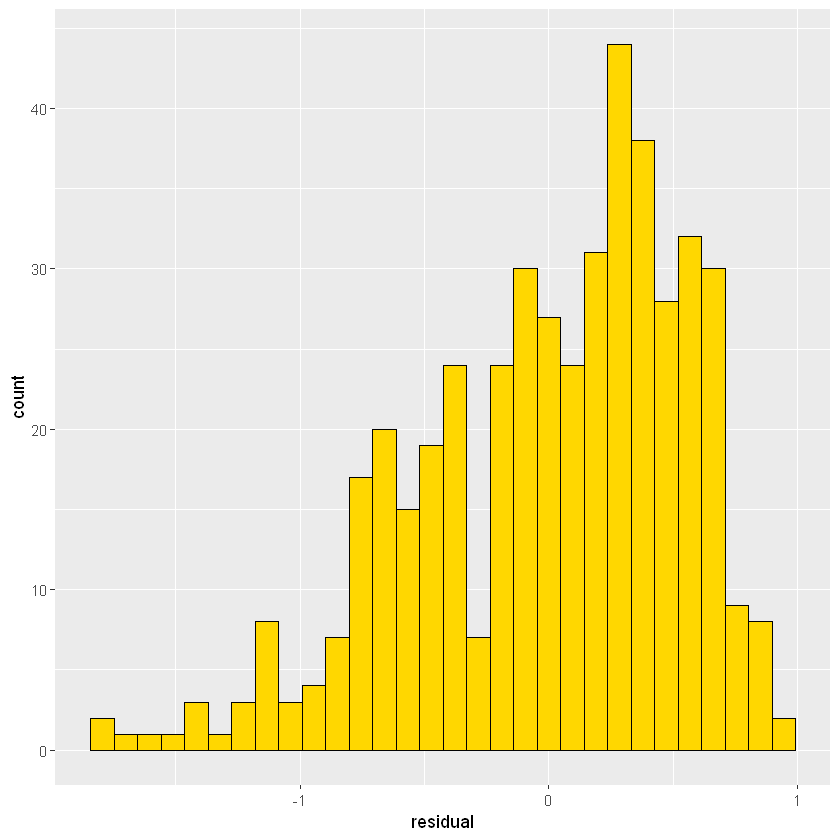

In [241]:
# plot residuals

reg_model_sc_gen_points %>% 
ggplot(aes(x=residual)) +
geom_histogram(color="black", fill="gold")

In [242]:
# teaching score by rank
statistics_scores_by_rank <- 
evals %>% group_by(rank) %>% summarize(n=n(), 
                                         Proportions=n/length(evals$rank),
                                         Median=median(score), 
                                         Mean = mean(score),
                                         Quantile_25=quantile(score, probs=c(0.25)),
                                         Quantile_75=quantile(score, probs=c(0.75)),
                                         Standard_Deviation = sd(score),
                                         IQR=Quantile_75-Quantile_25
                                         )
statistics_scores_by_rank

rank,n,Proportions,Median,Mean,Quantile_25,Quantile_75,Standard_Deviation,IQR
teaching,102,0.2203024,4.40,4.284314,3.9,4.7,0.4982633,0.8
tenure track,108,0.2332613,4.35,4.154630,3.7,4.6,0.5611044,0.9
tenured,253,0.5464363,4.20,4.139130,3.8,4.6,0.5502619,0.8


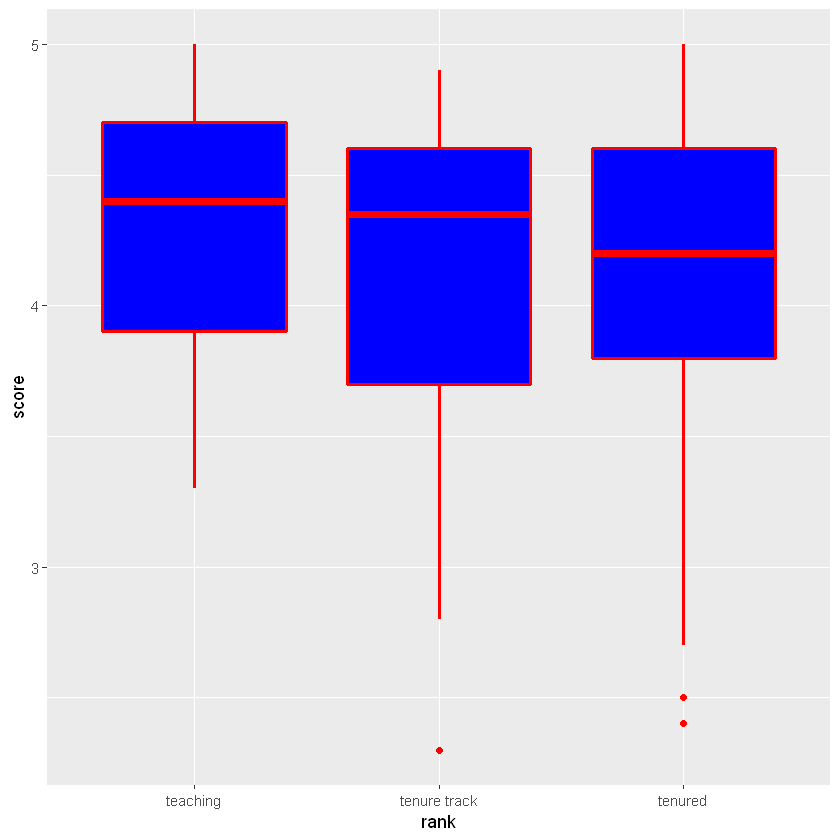

In [243]:
# visualize teaching score by rank with boxplot

evals %>% ggplot(aes(x=rank, y=score))+
geom_boxplot(color="red", size=1, fill="blue")


In [244]:
#linear regression
reg_model_sc_rank <- 
lm(score ~ rank, evals)
get_regression_table(reg_model_sc_rank)

# group means 

teaching_mean <-  4.284 
ranktenure_track_mean <-  4.284 - 0.130 
ranktenured <- 4.284 + 0.145

# In case of categorical variables the group means are the predictions.

input_1<- c(teaching_mean,ranktenure_track_mean, ranktenured )
dimnames_1 <- list(c("teaching_mean","ranktenure_track_mean", "ranktenured_mean"), "Scores")
matrix(input_1, ncol=1, nrow=3,   dimnames = dimnames_1)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,4.284,0.054,79.853,0.000,4.179,4.390
ranktenure track,-0.130,0.075,-1.733,0.084,-0.277,0.017
ranktenured,-0.145,0.064,-2.284,0.023,-0.270,-0.020


,Scores
teaching_mean,4.284
ranktenure_track_mean,4.154
ranktenured_mean,4.429


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


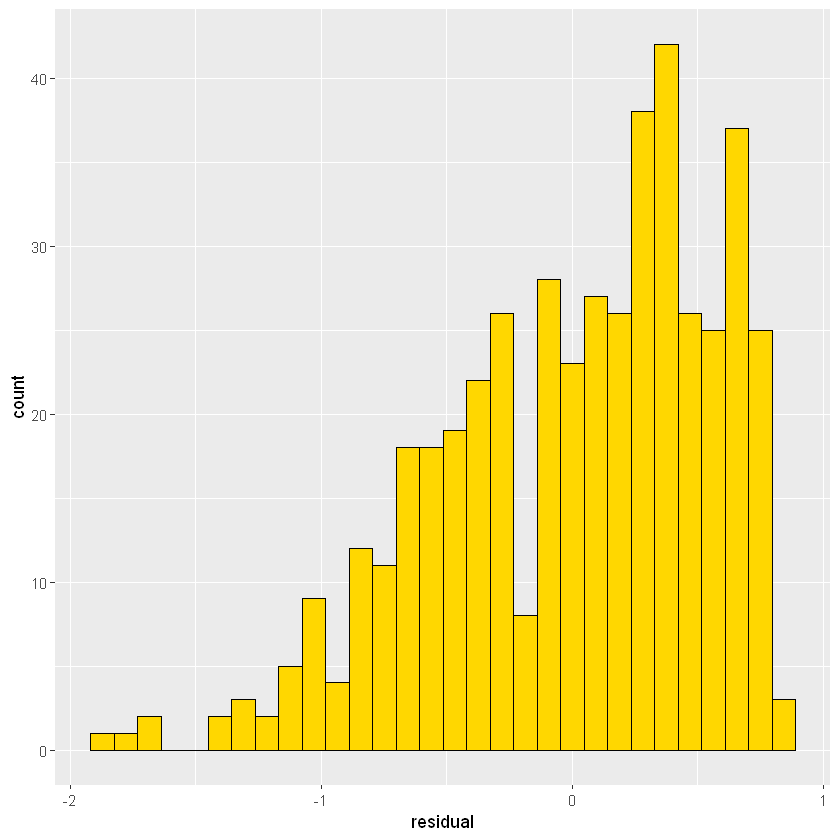

In [245]:
# plot residuals

get_regression_points(reg_model_sc_rank) %>% 
ggplot(aes(x=residual)) +
geom_histogram(color="black", fill="gold")

In [246]:

reg_model_score_age_gender <-
lm(score ~ age + gender, data=evals)


get_regression_table(reg_model_score_age_gender )
summary(reg_model_score_age_gender )

# all variables are significant given a test level of 0.05 and p-values below
# if the gender is male for every unit in age teaching scores increase by 0.190571
# given all other variables do not change
# if the gender is female for every unit in age teaching scores decrease by -0.008678




term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,4.484,0.125,35.792,0.000,4.238,4.730
age,-0.009,0.003,-3.280,0.001,-0.014,-0.003
gendermale,0.191,0.052,3.632,0.000,0.087,0.294



Call:
lm(formula = score ~ age + gender, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82833 -0.33494  0.09391  0.42882  0.91506 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.484116   0.125284  35.792  < 2e-16 ***
age         -0.008678   0.002646  -3.280 0.001117 ** 
gendermale   0.190571   0.052469   3.632 0.000313 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5343 on 460 degrees of freedom
Multiple R-squared:  0.03901,	Adjusted R-squared:  0.03484 
F-statistic: 9.338 on 2 and 460 DF,  p-value: 0.0001059


In [247]:
# reg_model_score_age_gender

pred_reg_model_score_age_gender <- 
predict(reg_model_score_age_gender)

head(get_regression_points(reg_model_score_age_gender))

rmse(evals$score, pred_reg_model_score_age_gender)

# adding gender did not result in better predictions

ID,score,age,gender,score_hat,residual
1,4.7,36,female,4.172,0.528
2,4.1,36,female,4.172,-0.072
3,3.9,36,female,4.172,-0.272
4,4.8,36,female,4.172,0.628
5,4.6,59,male,4.163,0.437
6,4.3,59,male,4.163,0.137


[1] 0.5325735

In [248]:
# checking for interaction effects
reg_model_score_age_gender_inter <-
lm(score ~ age * gender, data=evals)
get_regression_table(reg_model_score_age_gender_inter )
summary(reg_model_score_age_gender_inter)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,4.883,0.205,23.795,0.000,4.480,5.286
age,-0.018,0.004,-3.919,0.000,-0.026,-0.009
gendermale,-0.446,0.265,-1.681,0.094,-0.968,0.076
age:gendermale,0.014,0.006,2.446,0.015,0.003,0.024



Call:
lm(formula = score ~ age * gender, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86453 -0.34815  0.09863  0.40661  0.96327 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.882989   0.205210  23.795  < 2e-16 ***
age            -0.017523   0.004472  -3.919 0.000103 ***
gendermale     -0.446044   0.265407  -1.681 0.093520 .  
age:gendermale  0.013531   0.005531   2.446 0.014803 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5314 on 459 degrees of freedom
Multiple R-squared:  0.05138,	Adjusted R-squared:  0.04518 
F-statistic: 8.288 on 3 and 459 DF,  p-value: 2.227e-05


In [249]:
# reg_model_score_age_gender_inter
pred_reg_model_score_age_gender_inter <-
predict(reg_model_score_age_gender_inter)
head(get_regression_points(reg_model_score_age_gender_inter))
round(rmse(evals$score, pred_reg_model_score_age_gender_inter), 2)
# Considering interaction effects resulted in only a very slight improvement

ID,score,age,gender,score_hat,residual
1,4.7,36,female,4.252,0.448
2,4.1,36,female,4.252,-0.152
3,3.9,36,female,4.252,-0.352
4,4.8,36,female,4.252,0.548
5,4.6,59,male,4.201,0.399
6,4.3,59,male,4.201,0.099


[1] 0.53

In [250]:
install.packages("ggcorrplot",  repos = c("http://rstudio.org/_packages","http://cran.rstudio.com"))
library(ggcorrplot)

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://rstudio.org/_packages/bin/windows/contrib/3.5:
  kann URL 'http://rstudio.org/_packages/bin/windows/contrib/3.5/PACKAGES' nicht öffnen"Warning message:
"package 'ggcorrplot' is in use and will not be installed"

[1] 5.000 3.000 3.333 3.167 7.333 5.500 4.167 4.000 4.667 4.833 4.333 2.500
[13] 2.833 7.833 3.833 5.167 2.667 2.333 6.500 3.667 6.167 8.167 7.000 5.833
[25] 5.667 1.667 6.667 3.500 6.000 7.167 6.333 6.833 2.000 4.500 5.333

[1] "Freedman Diaconis rule for teaching scores version 1:  12"


Call:
	density.default(x = evals$age)

Data: evals$age (463 obs.);	Bandwidth 'bw' = 2.585

       x               y            
 Min.   :21.24   Min.   :6.330e-06  
 1st Qu.:36.12   1st Qu.:2.301e-03  
 Median :51.00   Median :2.155e-02  
 Mean   :51.00   Mean   :1.679e-02  
 3rd Qu.:65.88   3rd Qu.:2.702e-02  
 Max.   :80.76   Max.   :3.802e-02  

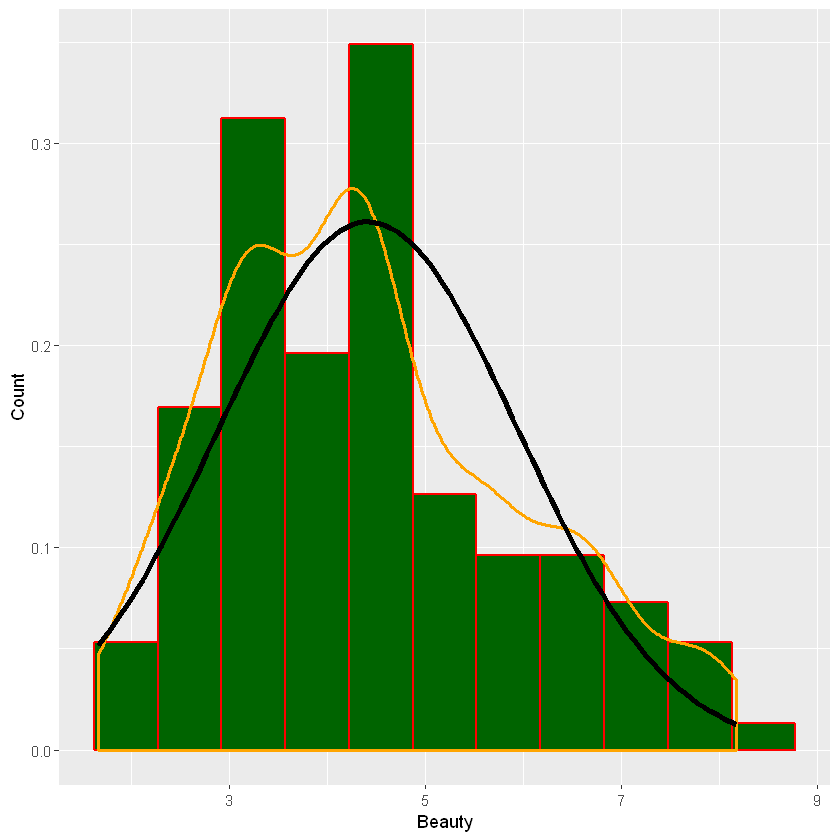

In [251]:
# bty_avg - Average beauty rating of professor.
unique(evals$bty_avg)
number_of_bins_score_beauty <- Freedman_Diaconis(evals$bty_avg)
paste("Freedman Diaconis rule for teaching scores version 1: ", number_of_bins_score_age)

evals %>%
ggplot(aes(x=bty_avg)) +
geom_histogram(color="red", size=0.8, fill="darkgreen", bins = number_of_bins_score_beauty, aes(y=..density..) ) +
geom_density(color="orange", size=1)+
labs(x="Beauty", y="Count")+
stat_function(fun=dnorm, args=(list(mean=mean(evals$bty_avg), sd=sd(evals$bty_avg))), color="black", size=1.5)

density(evals$age)


# distribution is right-skewed
# tail on the right
# mean > median > mode

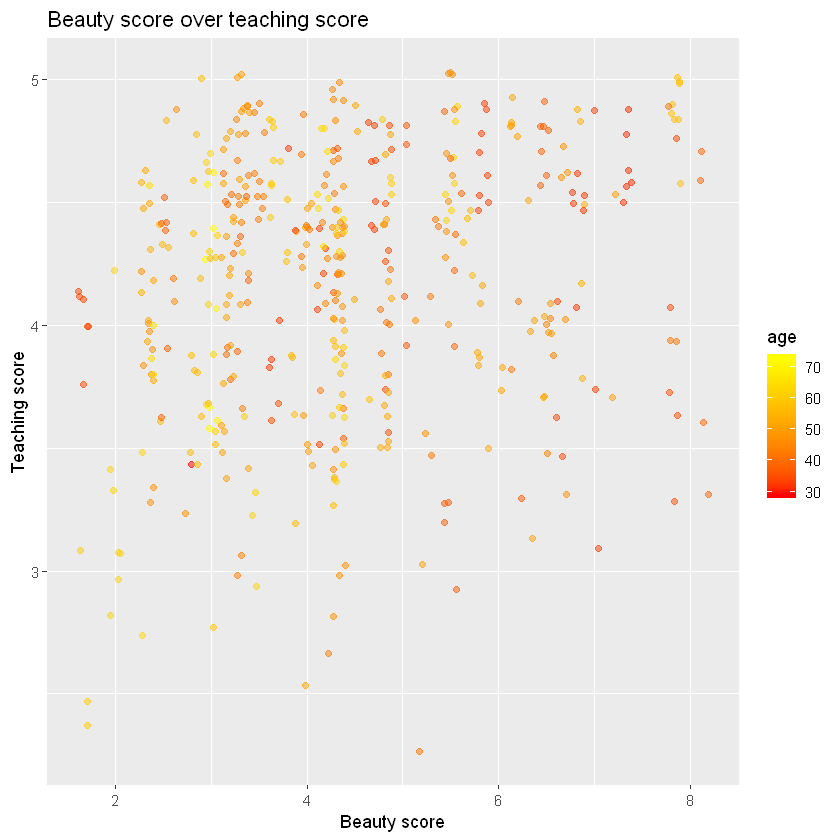

In [252]:
# EDA of the relationship between teaching score and beauty score

evals %>% ggplot(aes(x=bty_avg, y=score, color=age)) + geom_jitter(alpha=0.5)+
labs(title="Beauty score over teaching score", x="Beauty score", y="Teaching score")+
scale_color_gradient( low = "red", high = "yellow")

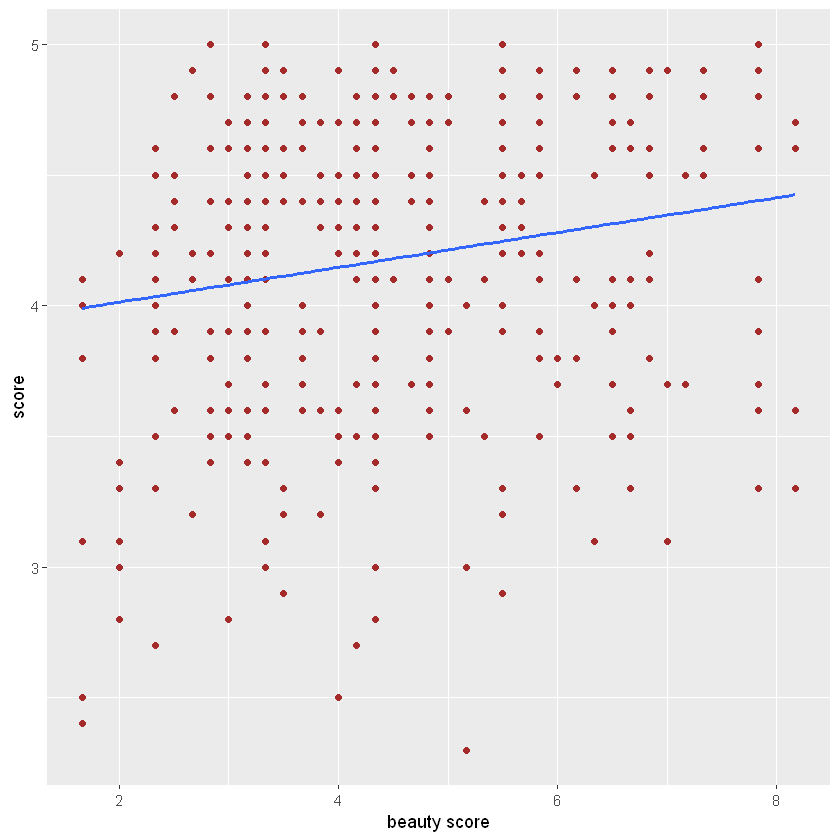

In [253]:
# regression line beauty score and teaching scores
ggplot(evals, aes(x = bty_avg, y = score)) +
  geom_point(color="brown") +
  labs(x = "beauty score", y = "score") +
  geom_smooth(method = 'lm', se = FALSE)

In [254]:
# Fit a simple linear regression model
model_score_beauty <- lm(score ~ bty_avg, data = evals)

# Output regression table
get_regression_table(model_score_beauty )

# For every increase of one in beauty score, you should observe an 
# associated increase of on average 0.0670 units in teaching score.

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,3.880,0.076,50.961,0,3.731,4.030
bty_avg,0.067,0.016,4.090,0,0.035,0.099


In [255]:
cor_beauty_score <- evals %>% summarize(Correlation_beauty_teachingscore=cor(bty_avg, score))
print(cor_beauty_score)
# both variables are weakly positively related

# A tibble: 1 x 1
  Correlation_beauty_teachingscore
                             <dbl>
1                            0.187


In [256]:
# building a model with all variables as predictors
reg_model_all_pred_var <-
lm(score~., data=evals)

reg_model_all_pred_var
summary(reg_model_all_pred_var)
head(get_regression_table(reg_model_all_pred_var))
head(get_regression_points(reg_model_all_pred_var))




Call:
lm(formula = score ~ ., data = evals)

Coefficients:
          (Intercept)                     ID                    age  
             4.953089              -0.000601              -0.008081  
              bty_avg             gendermale  ethnicitynot minority  
             0.031660               0.257385               0.026630  
  languagenon-english       ranktenure track            ranktenured  
            -0.260118              -0.162856              -0.171624  
 pic_outfitnot formal         pic_colorcolor           cls_did_eval  
            -0.145959              -0.290505               0.008507  
         cls_students         cls_levelupper  
            -0.005198              -0.111819  



Call:
lm(formula = score ~ ., data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72617 -0.33694  0.09712  0.37857  1.04283 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.9530886  0.2614337  18.946  < 2e-16 ***
ID                    -0.0006010  0.0002125  -2.829 0.004881 ** 
age                   -0.0080813  0.0032009  -2.525 0.011923 *  
bty_avg                0.0316595  0.0175994   1.799 0.072707 .  
gendermale             0.2573849  0.0522732   4.924 1.19e-06 ***
ethnicitynot minority  0.0266304  0.0758905   0.351 0.725824    
languagenon-english   -0.2601184  0.1127228  -2.308 0.021476 *  
ranktenure track      -0.1628563  0.0830295  -1.961 0.050447 .  
ranktenured           -0.1716244  0.0644016  -2.665 0.007978 ** 
pic_outfitnot formal  -0.1459592  0.0732964  -1.991 0.047047 *  
pic_colorcolor        -0.2905054  0.0742203  -3.914 0.000105 ***
cls_did_eval           0.0085069  0.0022963   3.705 0.00

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,4.953,0.261,18.946,0.000,4.439,5.467
ID,-0.001,0.000,-2.829,0.005,-0.001,0.000
age,-0.008,0.003,-2.525,0.012,-0.014,-0.002
bty_avg,0.032,0.018,1.799,0.073,-0.003,0.066
gendermale,0.257,0.052,4.924,0.000,0.155,0.360
ethnicitynot minority,0.027,0.076,0.351,0.726,-0.123,0.176


ID,score,age,bty_avg,gender,ethnicity,language,rank,pic_outfit,pic_color,cls_did_eval,cls_students,cls_level,score_hat,residual
1,4.7,36,5,female,minority,english,tenure track,not formal,color,24,43,upper,4.089,0.611
2,4.1,36,5,female,minority,english,tenure track,not formal,color,86,125,upper,4.190,-0.090
3,3.9,36,5,female,minority,english,tenure track,not formal,color,76,125,upper,4.104,-0.204
4,4.8,36,5,female,minority,english,tenure track,not formal,color,77,123,upper,4.123,0.677
5,4.6,59,3,male,not minority,english,tenured,not formal,color,17,20,upper,4.173,0.427
6,4.3,59,3,male,not minority,english,tenured,not formal,color,35,40,upper,4.222,0.078


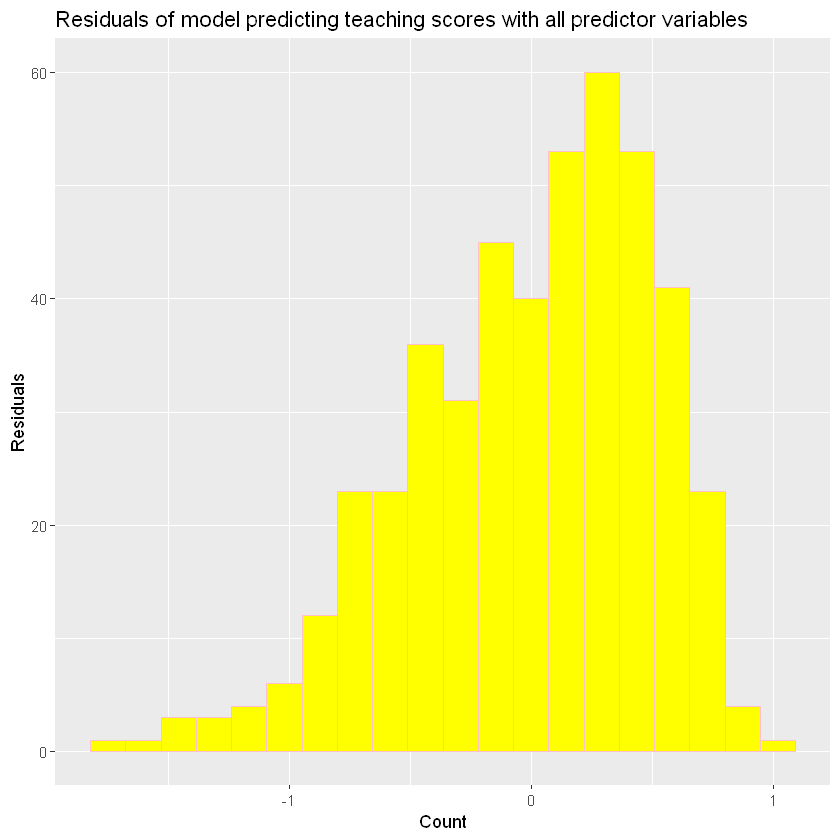

In [257]:
# visualize residuals

get_regression_points(reg_model_all_pred_var) %>% 
ggplot(aes(x=residual)) +
geom_histogram(color="pink", fill="yellow", bins=20)+
labs(x="Count", y="Residuals", title="Residuals of model predicting teaching scores with all predictor variables" )

In [258]:
# predicting with reg_model_all_pred_var

reg_model_all_pred_var_pred <- 
predict(reg_model_all_pred_var)

rmse(evals$score, reg_model_all_pred_var_pred )

# Incorporating all variables as predictor variables in the model resuls in an improved rmse
# Next: sort out variables with insignificant p-values

[1] 0.4968105

In [259]:
# Feature engineering
str(evals)

Classes 'tbl_df', 'tbl' and 'data.frame':	463 obs. of  13 variables:
 $ ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ score       : num  4.7 4.1 3.9 4.8 4.6 4.3 2.8 4.1 3.4 4.5 ...
 $ age         : int  36 36 36 36 59 59 59 51 51 40 ...
 $ bty_avg     : num  5 5 5 5 3 ...
 $ gender      : Factor w/ 2 levels "female","male": 1 1 1 1 2 2 2 2 2 1 ...
 $ ethnicity   : Factor w/ 2 levels "minority","not minority": 1 1 1 1 2 2 2 2 2 2 ...
 $ language    : Factor w/ 2 levels "english","non-english": 1 1 1 1 1 1 1 1 1 1 ...
 $ rank        : Factor w/ 3 levels "teaching","tenure track",..: 2 2 2 2 3 3 3 3 3 3 ...
 $ pic_outfit  : Factor w/ 2 levels "formal","not formal": 2 2 2 2 2 2 2 2 2 2 ...
 $ pic_color   : Factor w/ 2 levels "black&white",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ cls_did_eval: int  24 86 76 77 17 35 39 55 111 40 ...
 $ cls_students: int  43 125 125 123 20 40 44 55 195 46 ...
 $ cls_level   : Factor w/ 2 levels "lower","upper": 2 2 2 2 2 2 2 2 2 2 ...


In [260]:
# Discard ID: ID  a predictor makes not sense
# age + gender + language + rank + pic_outfitnotformal + pic_color + cls_did_eval + cls_students   
# select only variables with a significant p-value below 0.05

reg_model_selected_variables <-
lm(score ~ age + gender + language + rank +  pic_outfit + 
   pic_color + cls_did_eval + cls_students, data=evals)

summary(reg_model_selected_variables)

reg_model_selected_variables_table <-
get_regression_table(reg_model_selected_variables)
reg_model_selected_variables_residuals <-
get_regression_points(reg_model_selected_variables)

reg_model_selected_variables_table

head(reg_model_selected_variables_residuals)


Call:
lm(formula = score ~ age + gender + language + rank + pic_outfit + 
    pic_color + cls_did_eval + cls_students, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.70119 -0.35544  0.06943  0.39573  1.01461 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.058006   0.195107  25.924  < 2e-16 ***
age                  -0.010846   0.003079  -3.523 0.000470 ***
gendermale            0.253706   0.051802   4.898 1.35e-06 ***
languagenon-english  -0.304439   0.107009  -2.845 0.004643 ** 
ranktenure track     -0.200356   0.082252  -2.436 0.015240 *  
ranktenured          -0.205856   0.062829  -3.276 0.001132 ** 
pic_outfitnot formal -0.149420   0.072593  -2.058 0.040129 *  
pic_colorcolor       -0.287384   0.065242  -4.405 1.32e-05 ***
cls_did_eval          0.008488   0.002261   3.754 0.000197 ***
cls_students         -0.004989   0.001366  -3.653 0.000290 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,5.058,0.195,25.924,0.000,4.675,5.441
age,-0.011,0.003,-3.523,0.000,-0.017,-0.005
gendermale,0.254,0.052,4.898,0.000,0.152,0.356
languagenon-english,-0.304,0.107,-2.845,0.005,-0.515,-0.094
ranktenure track,-0.200,0.082,-2.436,0.015,-0.362,-0.039
ranktenured,-0.206,0.063,-3.276,0.001,-0.329,-0.082
pic_outfitnot formal,-0.149,0.073,-2.058,0.040,-0.292,-0.007
pic_colorcolor,-0.287,0.065,-4.405,0.000,-0.416,-0.159
cls_did_eval,0.008,0.002,3.754,0.000,0.004,0.013
cls_students,-0.005,0.001,-3.653,0.000,-0.008,-0.002


ID,score,age,gender,language,rank,pic_outfit,pic_color,cls_did_eval,cls_students,score_hat,residual
1,4.7,36,female,english,tenure track,not formal,color,24,43,4.020,0.680
2,4.1,36,female,english,tenure track,not formal,color,86,125,4.137,-0.037
3,3.9,36,female,english,tenure track,not formal,color,76,125,4.052,-0.152
4,4.8,36,female,english,tenure track,not formal,color,77,123,4.070,0.730
5,4.6,59,male,english,tenured,not formal,color,17,20,4.074,0.526
6,4.3,59,male,english,tenured,not formal,color,35,40,4.127,0.173


In [261]:
reg_model_selected_variables_pred <-
predict(reg_model_selected_variables)

# Sum of squared residuals
get_regression_points(reg_model_selected_variables) %>% mutate(SR=residual^2) %>% summarize(SSR=sum(SR))

rmse(evals$score, reg_model_selected_variables_pred)

SSR
117.1716


[1] 0.5030624

In [262]:

# Model assesment of all developed models using RSS
# Writing a function finding RSS over many lm models
# Using a foor loop extracting RSS and model name

# Input lists




Reg_models <- list(reg_model_selected_variables, 
                   reg_model_all_pred_var,
                   model_score_beauty,
                   reg_model_score_age_gender,
                   reg_model_sc_rank,
                   reg_score_age_beauty_interaction,
                   reg_score_age_beauty,
                   reg_score_age)


Reg_models_names <- list("reg_model_selected_variables", 
                          "reg_model_all_pred_var",
                          "model_score_beauty",
                          "reg_model_score_age_gender",
                          "reg_model_sc_rank",
                          "reg_score_age_beauty_interaction",
                          "reg_score_age_beauty",
                          "reg_score_age")




RSS_finding_for_many_models <- 

function(regression_models, regression_model_names){
    
        RSS_vector <- c()
        RSS_reg_model_names <- c()
    
        for (i in 1:length(regression_models)) {
        

    
        RSS <- get_regression_points(regression_models[[i]]) %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
        # Sum of residuals square
        # RSS <- as.numeric(RSS)
        # RSS_vector[i] <- RSS
        
        RSS_vector[i] <- RSS
        RSS_reg_model_names[i] <- regression_model_names[[i]]
        
        
        
    }
    
    mapped <- mapply(c, RSS_reg_model_names, RSS_vector )
    mapped <- mapped[, order(mapped[2,])]
    return(mapped)
}


RSS_finding_for_many_models(Reg_models, Reg_models_names)


# Conclusion:
# The model "reg_model_all_pred_var" - model using all predictor variables including ID has the lowest RSS
# This model delivers therefore according to RRS the best predictions.
# Lm with power transformed values could deliver better results.


reg_model_all_pred_var,reg_model_selected_variables,reg_score_age_beauty_interaction,reg_model_score_age_gender,reg_score_age_beauty,model_score_beauty,reg_model_sc_rank,reg_score_age
reg_model_all_pred_var,reg_model_selected_variables,reg_score_age_beauty_interaction,reg_model_score_age_gender,reg_score_age_beauty,model_score_beauty,reg_model_sc_rank,reg_score_age
114.275028,117.171615,128.321091,131.315105,131.463158,131.878518,135.065225,135.075843


In [263]:

# Writing a function calculating the R-squared over all models
# R2 is a measure of model fit

R_squared_calc_over_many_models <- 
function(regression_models, R_squared_reg_model_names, dependent_variable){
    
    R_squared_vector <- c()
    R_squared_names_vector<- c()
    
    for (i in 1:length(regression_models)) {
    
    RSS <- get_regression_points(regression_models[[i]])  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
    
    RSS <- as.numeric(RSS)
    
    # Total sum of square
    
    Deviation_Mean <- (dependent_variable - mean(dependent_variable))^2
    TSS <- sum(Deviation_Mean)
    
    R_squared <- 1- RSS / TSS
    
    R_squared_vector[i] <- R_squared
    R_squared_names_vector[i] <- R_squared_reg_model_names[[i]]
    
    }
    
    mapped <- mapply(c, R_squared_names_vector, R_squared_vector)
    mapped <- mapped[, order(mapped[2,], decreasing = TRUE)]
    return(mapped)
    
}



R_squared_calc_over_many_models(regression_models=Reg_models, 
                                R_squared_reg_model_names=Reg_models_names, 
                                dependent_variable=evals$score)



# The model "reg_model_all_pred_var" has the highest r-squared with 0.163765841959724
# This supports the conclusion with the RSS
# However the R-squared is not very good.
# Transforming the variable can result in better predictions.



reg_model_all_pred_var,reg_model_selected_variables,reg_score_age_beauty_interaction,reg_model_score_age_gender,reg_score_age_beauty,model_score_beauty,reg_model_sc_rank,reg_score_age
reg_model_all_pred_var,reg_model_selected_variables,reg_score_age_beauty_interaction,reg_model_score_age_gender,reg_score_age_beauty,model_score_beauty,reg_model_sc_rank,reg_score_age
0.163765841959724,0.142569391313171,0.0609805014338333,0.0390711060018689,0.0379876936591449,0.034948200027311,0.0116287286458117,0.0115510289554641


In [264]:
# Writing a function calculating the rmse over all models
# rmse is a commonly used measure of preditive error.
# rmse can be thought of as the 'typical' error a predicive model will make.

rmse_calc_over_many_models <- 
function(regression_models, rmse_reg_model_names, response_variable){
    
    rmse_vector <- c()
    rmse_names_vector<- c()
    
    for (i in 1:length(regression_models)) {
        
        rmse_vector[i] <- rmse(response_variable, predict(regression_models[[i]]))
        rmse_names_vector[i] <- rmse_reg_model_names[[i]]
        
    
    
    }
    
    mapped <- mapply(c, rmse_names_vector, rmse_vector)
    mapped <- mapped[, order(mapped[2,], decreasing = FALSE)]
    return(mapped)
    
}



rmse_calc_over_many_models(regression_models=Reg_models, 
                           rmse_reg_model_names=Reg_models_names, 
                           response_variable=evals$score)


# The model "reg_model_all_pred_var" has the highest r-squared with 0.496810538127208
# Lower values of the rmse point to a better model fit
# This supports the conclusion with the RSS and R-squared
# Transforming the variable can result in better predictions.




reg_model_all_pred_var,reg_model_selected_variables,reg_score_age_beauty_interaction,reg_model_score_age_gender,reg_score_age_beauty,model_score_beauty,reg_model_sc_rank,reg_score_age
reg_model_all_pred_var,reg_model_selected_variables,reg_score_age_beauty_interaction,reg_model_score_age_gender,reg_score_age_beauty,model_score_beauty,reg_model_sc_rank,reg_score_age
0.496810538127208,0.503062402120685,0.52645713368483,0.532573498183805,0.532915294230919,0.533678698301285,0.540108772025648,0.540156066212147


In [265]:
# Mean Square Error = Mean Square Residuals; Residuals = Errors = gap between observed values and predicted values

rmse_calc_over_many_models_alt <- 

function(regression_models, regression_model_names){
    
        rmse_vector <- c()
        rmse_reg_model_names <- c()
    
        for (i in 1:length(regression_models)) {
        

    
        rmse <- get_regression_points(regression_models[[i]]) %>% 
                mutate(RS=residual^2) %>% summarize(RSS=sqrt(mean(RS)))
        # Sum of residuals square
        # RSS <- as.numeric(RSS)
        # RSS_vector[i] <- RSS
        
        rmse_vector[i] <- rmse
        rmse_reg_model_names[i] <- regression_model_names[[i]]
        
        
        
    }
    
    mapped <- mapply(c, rmse_reg_model_names, rmse_vector )
    mapped <- mapped[, order(mapped[2,])]
    return(mapped)
}


rmse_calc_over_many_models_alt(Reg_models, Reg_models_names)


# This version of calculating rmse delivers the same result

reg_model_all_pred_var,reg_model_selected_variables,reg_score_age_beauty_interaction,reg_model_score_age_gender,reg_score_age_beauty,model_score_beauty,reg_model_sc_rank,reg_score_age
reg_model_all_pred_var,reg_model_selected_variables,reg_score_age_beauty_interaction,reg_model_score_age_gender,reg_score_age_beauty,model_score_beauty,reg_model_sc_rank,reg_score_age
0.496804101567985,0.503061072599122,0.526451692417494,0.532557919258564,0.532858054516866,0.533699177528908,0.540108830325993,0.540130059931373


In [266]:
# Transforming all numerical variables of the data set evals with the logarithm to the basis 10
# Reduce skewness of the distribution, make better predictions with condensed and compact distributions

# Look at the data
# log10(evals$score)
# glimpse(evals)

evals_log_transformed <-                
evals %>% mutate(  log10_score =log10(score), log10_age =log10(age ), 
                    log10_bty_avg =log10(bty_avg), log10_cls_did_eval =log10(cls_did_eval),
                    log10_cls_students =log10(cls_students)) 

# glimpse(evals_log_transformed)

evals_log_transformed_select <- 
evals_log_transformed %>% dplyr :: select(ID, gender , ethnicity, language , rank , pic_outfit ,  pic_color, cls_level, 
                                         log10_score , log10_age, log10_bty_avg , log10_cls_did_eval, 
                                         log10_cls_students)
           
glimpse(evals_log_transformed_select)

Observations: 463
Variables: 13
$ ID                 <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
$ gender             <fct> female, female, female, female, male, male, male...
$ ethnicity          <fct> minority, minority, minority, minority, not mino...
$ language           <fct> english, english, english, english, english, eng...
$ rank               <fct> tenure track, tenure track, tenure track, tenure...
$ pic_outfit         <fct> not formal, not formal, not formal, not formal, ...
$ pic_color          <fct> color, color, color, color, color, color, color,...
$ cls_level          <fct> upper, upper, upper, upper, upper, upper, upper,...
$ log10_score        <dbl> 0.6720979, 0.6127839, 0.5910646, 0.6812412, 0.66...
$ log10_age          <dbl> 1.556303, 1.556303, 1.556303, 1.556303, 1.770852...
$ log10_bty_avg      <dbl> 0.6989700, 0.6989700, 0.6989700, 0.6989700, 0.47...
$ log10_cls_did_eval <dbl> 1.380211, 1.934498, 1.880814, 1.886491, 1.230449...
$ log10_cls_students

In [267]:
# Build a regression model with evals_log_transformed_select using log transformed numerical values

reg_model_evals_log_transformed_select_all_variables <-
lm(log10_score ~ ., data=evals_log_transformed_select)

get_regression_table(reg_model_evals_log_transformed_select_all_variables)
summary(reg_model_evals_log_transformed_select_all_variables)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
intercept,0.841,0.077,10.860,0.000,0.689,0.993
ID,0.000,0.000,-2.140,0.033,0.000,0.000
gendermale,0.027,0.006,4.554,0.000,0.015,0.038
ethnicitynot minority,0.006,0.009,0.679,0.498,-0.011,0.023
languagenon-english,-0.025,0.013,-1.997,0.046,-0.050,0.000
ranktenure track,-0.023,0.010,-2.368,0.018,-0.041,-0.004
ranktenured,-0.018,0.007,-2.464,0.014,-0.032,-0.004
pic_outfitnot formal,-0.015,0.008,-1.930,0.054,-0.031,0.000
pic_colorcolor,-0.026,0.008,-3.108,0.002,-0.042,-0.010
cls_levelupper,-0.009,0.007,-1.240,0.216,-0.022,0.005



Call:
lm(formula = log10_score ~ ., data = evals_log_transformed_select)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24679 -0.03236  0.01258  0.03978  0.10444 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            8.412e-01  7.745e-02  10.860  < 2e-16 ***
ID                    -5.105e-05  2.386e-05  -2.140  0.03291 *  
gendermale             2.654e-02  5.828e-03   4.554 6.79e-06 ***
ethnicitynot minority  5.816e-03  8.567e-03   0.679  0.49754    
languagenon-english   -2.517e-02  1.260e-02  -1.997  0.04641 *  
ranktenure track      -2.263e-02  9.556e-03  -2.368  0.01832 *  
ranktenured           -1.781e-02  7.226e-03  -2.464  0.01411 *  
pic_outfitnot formal  -1.536e-02  7.960e-03  -1.930  0.05427 .  
pic_colorcolor        -2.592e-02  8.338e-03  -3.108  0.00200 ** 
cls_levelupper        -8.510e-03  6.863e-03  -1.240  0.21558    
log10_age             -1.120e-01  4.006e-02  -2.796  0.00540 ** 
log10_bty_avg          4.94

In [268]:
# Model assesement

RSS_log_transformed_select <-
RSS_calc_fun(reg_model_evals_log_transformed_select_all_variables)


R_squared_log_transformed_select <-
R_squared_calc(regression_model=reg_model_evals_log_transformed_select_all_variables, 
               dependent_variable=evals_log_transformed_select$log10_score)


rmse_evals_log_transformed_select <- 
rmse(evals_log_transformed_select$log10_score, predict(reg_model_evals_log_transformed_select_all_variables))



# RSS_finding_for_many_models(Reg_models_log_transformed, Reg_models_names_log_transformed)
# Does not work why?
# for (i in 1:length(reg_models)), reg_models is a specific list of models and not a variable
# Forrected: for (i in 1:length(regression_models))

Reg_models_evals_log_transformed <-
list(reg_model_evals_log_transformed_select_all_variables)

Reg_models_evals_log_transformed_names <-
list("reg_model_evals_log_transformed_select_all_variables")

RSS_evals_log_transformed_select <-
RSS_finding_for_many_models(Reg_models_evals_log_transformed , Reg_models_evals_log_transformed_names )

paste("RSS_log_transformed: ", RSS_evals_log_transformed_select)
paste("R_squared_log_transformed: ", R_squared_log_transformed_select)
paste("rmse_evals_log_transformed: ", rmse_evals_log_transformed_select)

# Conclusion:
# rmse_evals_log_transformed:  0.0556551904827319 compared with 0.496810538127208 of the  best not transformed model
# The data tranformation resulted in significant improvement in model performance or quality
# rmse is on the same scale as the response variable
# rmse has the same unit as the dependent variable
# R_squared_log_transformed:  0.156161609055826 compared 0.163765841959724 of the  best not transformed model
# R_squared not tranformed is a slightly better fit
# The RSS is not useful to compare between transformed and not transformed data
# The scale is different
# It could be useful comparing within transformed data

rmse_reverse_transformation <-
10^(0.0556551904827319)


evals %>% summarize(Minimum=min(score),
                    Maximum=max(score),
                    rmse_reversed=rmse_reverse_transformation)


[1] "RSS_log_transformed:  reg_model_evals_log_transformed_select_all_variables"
[2] "RSS_log_transformed:  1.434763"

[1] "R_squared_log_transformed:  0.156161609055826"

[1] "rmse_evals_log_transformed:  0.0556551904827319"

Minimum,Maximum,rmse_reversed
2.3,5,1.136724


Observations: 463
Variables: 13
$ ID           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
$ score        <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8,...
$ age          <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40...
$ bty_avg      <dbl> 5.000, 5.000, 5.000, 5.000, 3.000, 3.000, 3.000, 3.333...
$ gender       <fct> female, female, female, female, male, male, male, male...
$ ethnicity    <fct> minority, minority, minority, minority, not minority, ...
$ language     <fct> english, english, english, english, english, english, ...
$ rank         <fct> tenure track, tenure track, tenure track, tenure track...
$ pic_outfit   <fct> not formal, not formal, not formal, not formal, not fo...
$ pic_color    <fct> color, color, color, color, color, color, color, color...
$ cls_did_eval <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, 1...
$ cls_students <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 20...
$ cls_level    <fct>

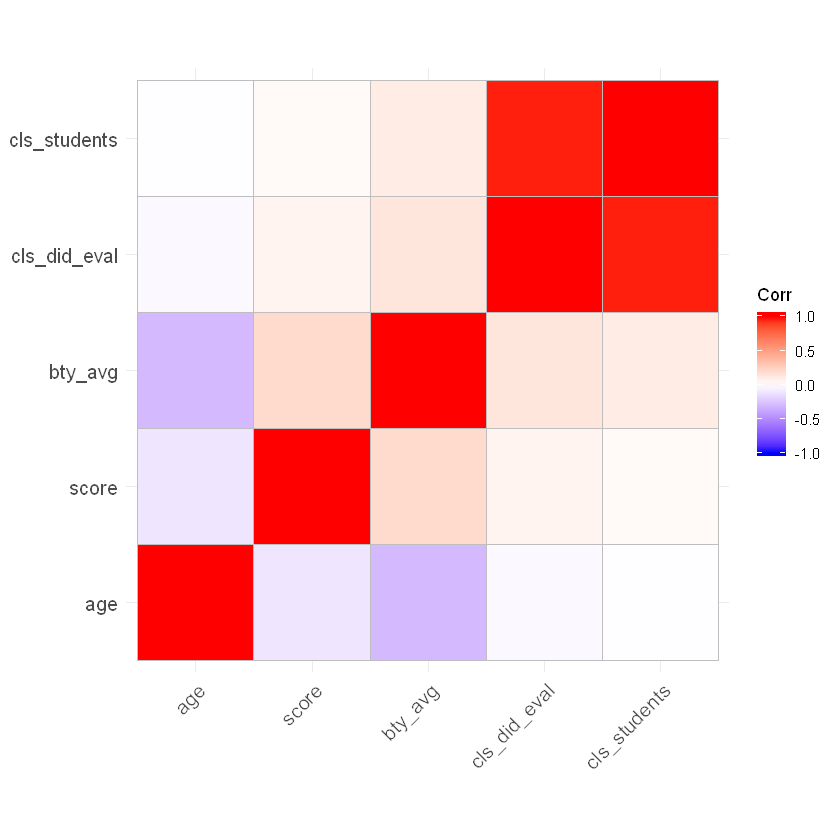

In [269]:
# correlation plot over the numeric variables of evals - evaluations
glimpse(evals)

evals_age_other <- dplyr::select(evals , age, score, bty_avg, cls_did_eval, cls_students)

cor_matrix_evals <- round(cor(evals_age_other), 4)
ggcorrplot(cor_matrix_evals)